In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import FunctionTransformer,OneHotEncoder,StandardScaler,KBinsDiscretizer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer,TransformedTargetRegressor
from sklearn.linear_model import LinearRegression,ARDRegression,PassiveAggressiveRegressor,GammaRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostRegressor,\
BaggingRegressor,GradientBoostingRegressor,HistGradientBoostingRegressor,RandomForestRegressor
from sklearn.metrics import r2_score

## problem
The data set contains cars in belerun with attributes like make model pricUSD which is our target column year etc and the project is to predict the price of the car in blerus

## Features

- `make` - Machine firm or car manufacturer

- `model` - Machine model

- `priceUSD` - Price in USD (target variable)

- `year`	- Year of production

- `condition`	- Represents the condition at the sale moment

- `mileage` - Mileage in kilometers

- `fuel type`	- Type of fuel (electro, petrol, diesel)

- `volume(cm3)` - Volume of the engine in cubic centimeters

- `color`	- Color of the car

- `transmission` - Type of transmission

- `drive unit` - Drive unit
- `segment` - Segment of the car

## dirty data
- `model` have some value just a number  in index '188	mazda	3'
- `mileage` have some value 0 km
- `mileage` contain low value like 100 maybe outlier
- `voluem` have 47 missing value
- `drive unit` have 3% of missing values
- `segment ` 9% missing values
- `price` have big outliers
- `year` got 1910 which is unbelevable
- `mileage` also got a big outlier
- `volume` got outliers 


## Data assessing

In [3]:
# Read dataset
train = pd.read_csv("cars.csv")

In [4]:
train.sample(20)

,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment
30360,volkswagen,jetta,17700,2018,with mileage,13000.0,petrol,1400.0,brown,auto,front-wheel drive,C
13277,audi,a8,5500,2000,with mileage,400000.0,petrol,4200.0,silver,auto,all-wheel drive,F
33589,daewoo,matiz,3200,2011,with mileage,13448.0,petrol,800.0,other,mechanics,front-wheel drive,A
45859,renault,scenic,2300,1998,with mileage,251000.0,petrol,1600.0,blue,mechanics,front-wheel drive,M
31782,renault,laguna,2500,1998,with mileage,313000.0,petrol,2000.0,green,mechanics,front-wheel drive,D
53565,bmw,x5,43750,2014,with mileage,137000.0,diesel,3000.0,black,auto,all-wheel drive,J
24366,daewoo,espero,1350,1996,with mileage,240.0,petrol,1800.0,silver,mechanics,front-wheel drive,D
8759,bmw,5-seriya,4000,1997,with mileage,349837.0,petrol,2300.0,green,mechanics,rear drive,E
16038,toyota,avensis,16999,2016,with mileage,115000.0,diesel,2000.0,black,mechanics,front-wheel drive,D
18442,volkswagen,caddy,7200,2008,with mileage,197000.0,petrol,1400.0,blue,mechanics,front-wheel drive,M


In [5]:
print('shape of the data',train.shape)

shape of the data (56244, 12)


In [6]:
train.describe()

,priceUSD,year,mileage(kilometers),volume(cm3)
count,56244.000000,56244.000000,5.624400e+04,56197.000000
mean,7415.456440,2003.454840,2.443956e+05,2104.860615
std,8316.959261,8.144247,3.210307e+05,959.201633
min,48.000000,1910.000000,0.000000e+00,500.000000
25%,2350.000000,1998.000000,1.370000e+05,1600.000000
50%,5350.000000,2004.000000,2.285000e+05,1996.000000
75%,9807.500000,2010.000000,3.100000e+05,2300.000000
max,235235.000000,2019.000000,9.999999e+06,20000.000000


In [7]:
# Check missing values in each column
train.isna().mean()*100

make                   0.000000
model                  0.000000
priceUSD               0.000000
year                   0.000000
condition              0.000000
mileage(kilometers)    0.000000
fuel_type              0.000000
volume(cm3)            0.083564
color                  0.000000
transmission           0.000000
drive_unit             3.387028
segment                9.407226
dtype: float64

In [8]:
# Describe the data
train.describe()

,priceUSD,year,mileage(kilometers),volume(cm3)
count,56244.000000,56244.000000,5.624400e+04,56197.000000
mean,7415.456440,2003.454840,2.443956e+05,2104.860615
std,8316.959261,8.144247,3.210307e+05,959.201633
min,48.000000,1910.000000,0.000000e+00,500.000000
25%,2350.000000,1998.000000,1.370000e+05,1600.000000
50%,5350.000000,2004.000000,2.285000e+05,1996.000000
75%,9807.500000,2010.000000,3.100000e+05,2300.000000
max,235235.000000,2019.000000,9.999999e+06,20000.000000


In [9]:
train.head()

,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment
0,mazda,2,5500,2008,with mileage,162000.0,petrol,1500.0,burgundy,mechanics,front-wheel drive,B
1,mazda,2,5350,2009,with mileage,120000.0,petrol,1300.0,black,mechanics,front-wheel drive,B
2,mazda,2,7000,2009,with mileage,61000.0,petrol,1500.0,silver,auto,front-wheel drive,B
3,mazda,2,3300,2003,with mileage,265000.0,diesel,1400.0,white,mechanics,front-wheel drive,B
4,mazda,2,5200,2008,with mileage,97183.0,diesel,1400.0,gray,mechanics,front-wheel drive,B


# EDA

In [10]:
cols_to_drop = []
cols_model = []
cols_log = []

### Univariate analysis of target column

In [11]:
print('Median Price :',train.priceUSD.median())

Median Price : 5350.0


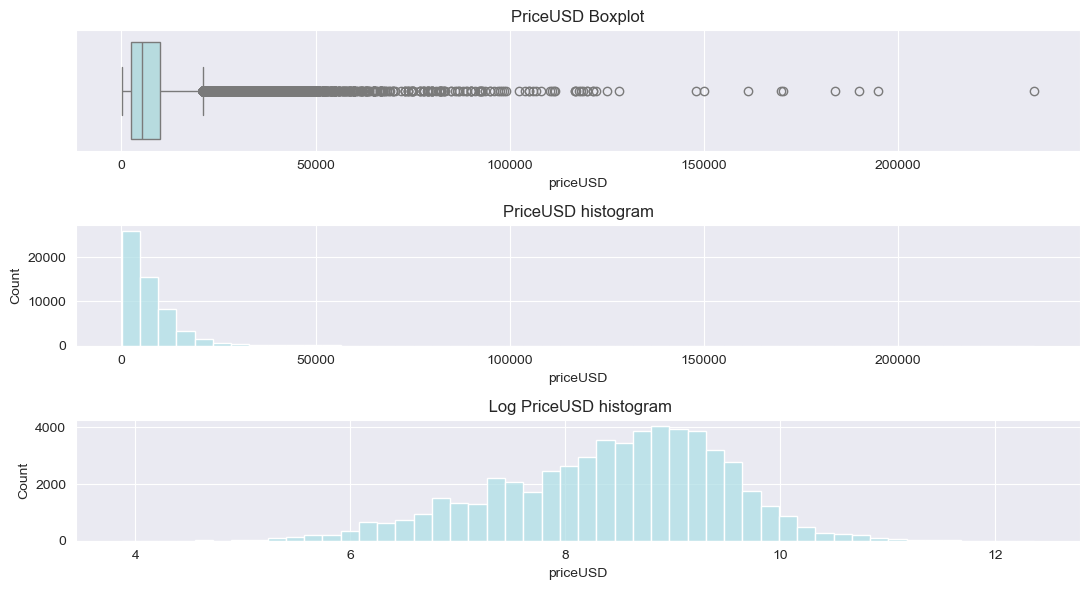

In [12]:
fig, ax = plt.subplots(3,1,figsize=(11,6))

sns.boxplot(data=train,x='priceUSD',ax=ax[0],color='powderblue')
ax[0].set_title('PriceUSD Boxplot')

sns.histplot(data=train,x='priceUSD',ax=ax[1],color='powderblue',bins=50)
ax[1].set_title('PriceUSD histogram')

sns.histplot(x=np.log(train['priceUSD']),ax=ax[2],color='powderblue',bins=50)
ax[2].set_title(' Log PriceUSD histogram')

plt.tight_layout()

In [13]:
print('target column Skew : ',train.priceUSD.skew())

target column Skew :  5.142168964138736


The target column is highly right skewed and the median is 5000 range . There are some big outliers we can treat the outlier later after we do eda

In [14]:
# Univariate analysis of manufacturers
train.make.sample(9)

29627         honda
2864        peugeot
4733          volvo
51956          opel
6588       lada-vaz
7084            gaz
13621       hyundai
54589         volvo
48935    volkswagen
Name: make, dtype: object

In [15]:
# Check the number of unique manufactures in belris
print('count of unique manufactures : ',train.make.nunique())

count of unique manufactures :  96


Text(0.5, 0, 'MANUFACTURES')

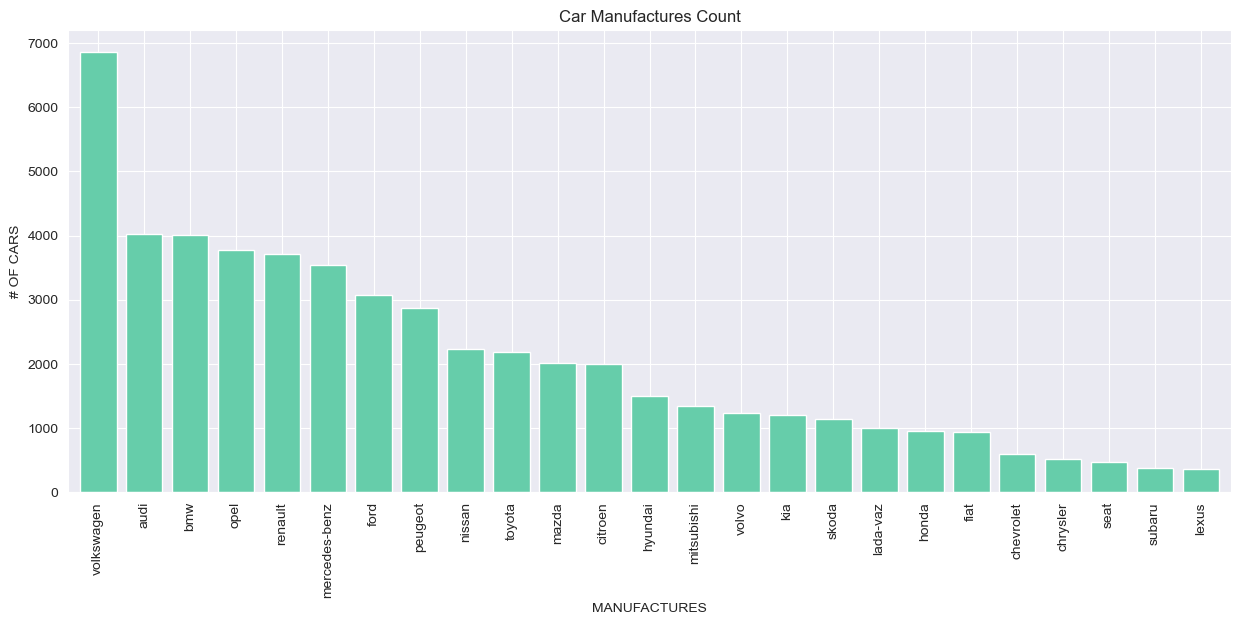

In [16]:
# Check value counts
plt.figure(figsize=(15,6))
train.make.value_counts().head(25).plot(kind='bar',color='mediumaquamarine',width=0.80)
plt.ylabel('# OF CARS')
plt.title('Car Manufactures Count')
plt.xlabel('MANUFACTURES')

In [17]:
most_repeated_make = train.make.value_counts().head(20).index

most common manufactures are volkwagen(why) audi, bmw, opel, renualt, benz, ford.so what we will do is we will change the less common manufactures to others and keep which car manufacture have more than 1000 value_count

In [18]:
# Bivariate analysis
make_revenue = train.groupby('make').agg({'model':'count',"priceUSD":'median'})\
            .sort_values(by='model',ascending=False)\
            .rename(columns={'model':'count',"priceUSD":"priceUSD_median"})

In [19]:
make_mean_price = train.groupby('make')['priceUSD'].mean()\
            .sort_values(ascending=False).reset_index().rename(columns=  {"priceUSD":"priceUSD_mean"})

In [20]:
make_mean_price

,make,priceUSD_mean
0,bentley,137355.666667
1,mclaren,121500.000000
2,aston-martin,95000.000000
3,tesla,74635.500000
4,maserati,40640.000000
...,...,...
91,izh,755.692308
92,proton,733.000000
93,raf,611.000000
94,wartburg,552.400000


In [21]:
make_revenue_df = make_revenue.merge(make_mean_price,on='make')

In [22]:
make_revenue_df.head(20)

,make,count,priceUSD_median,priceUSD_mean
0,volkswagen,6861,6000.0,6871.149395
1,audi,4030,5600.0,7840.631762
2,bmw,4013,8300.0,11383.815350
3,opel,3779,4000.0,4729.802593
4,renault,3713,3500.0,4932.256666
5,mercedes-benz,3541,7600.0,11795.553516
6,ford,3078,3900.0,5714.708577
7,peugeot,2876,4000.0,4695.898818
8,nissan,2233,6200.0,7204.050605
9,toyota,2177,8650.0,11494.219109


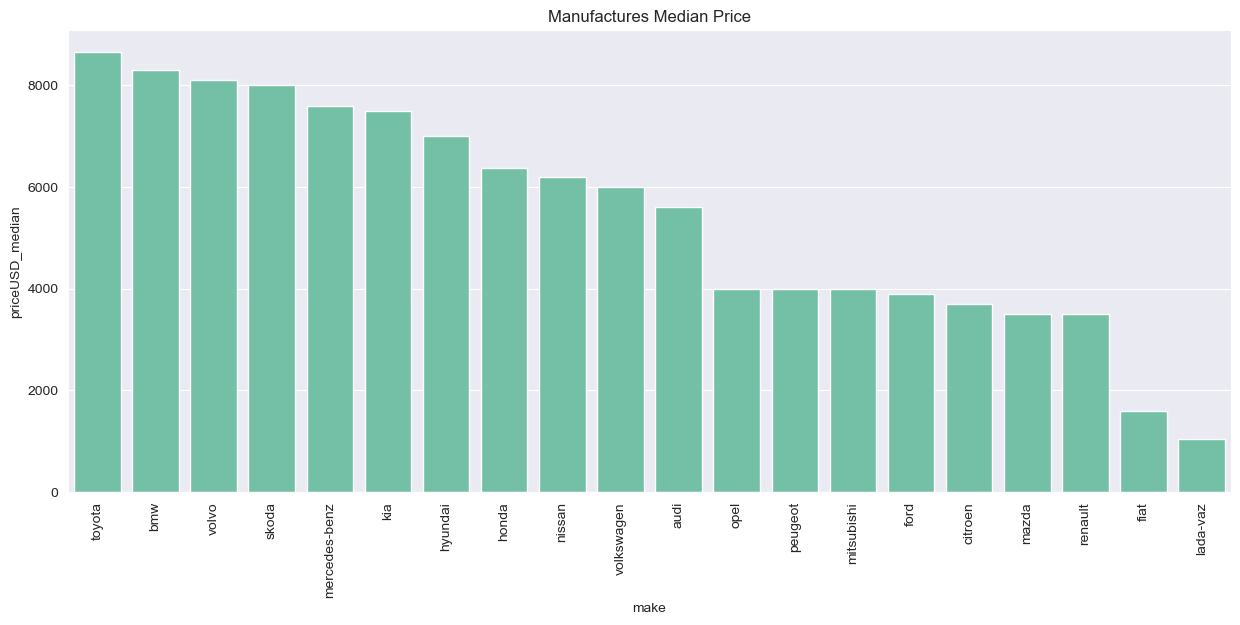

In [23]:
plt.figure(figsize=(15,6))
sns.barplot(data=make_revenue_df.head(20)\
            .sort_values(by='priceUSD_median',ascending=False),
            x='make',y='priceUSD_median',
            color='mediumaquamarine')
plt.xticks(rotation='vertical')
plt.title('Manufactures Median Price')
plt.show()

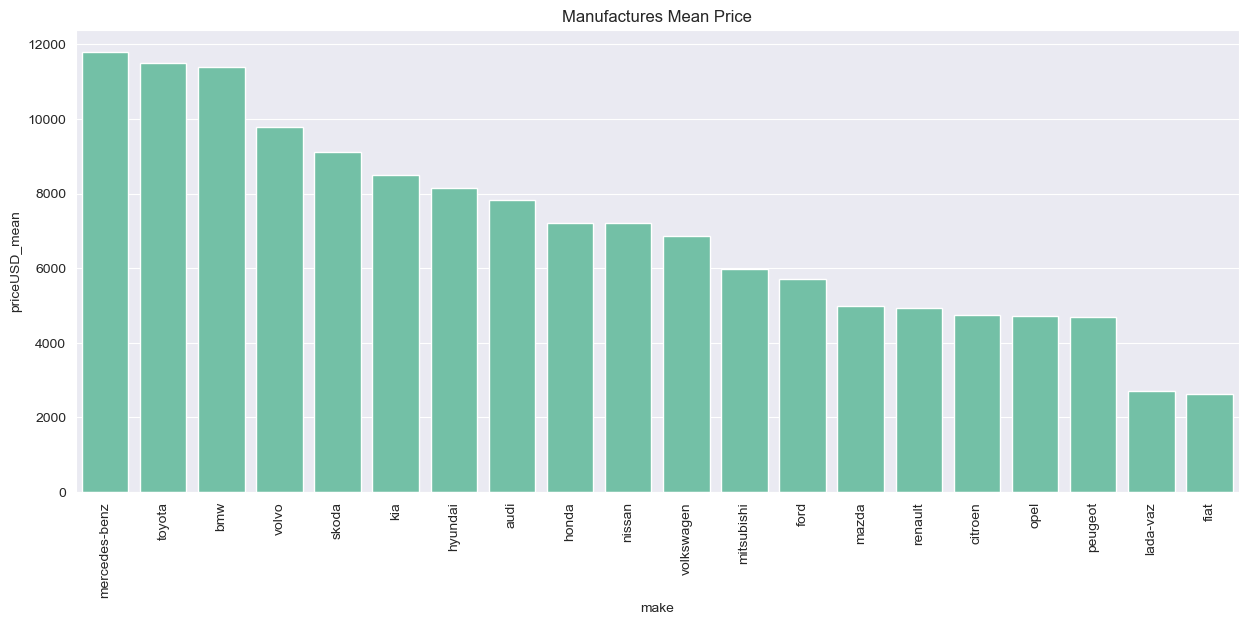

In [24]:
plt.figure(figsize=(15,6))
sns.barplot(data=make_revenue_df.head(20)\
            .sort_values(by='priceUSD_mean',ascending=False)
            ,x='make',y='priceUSD_mean',
            color='mediumaquamarine')
plt.xticks(rotation='vertical')
plt.title('Manufactures Mean Price')
plt.show()

- In median and mean price toyota seems have average of range between 8000 to 11500
- benz is forth place according to mediam but first according to mean (may be it contain some outlier value more)

**This colomn shows that there is a great variability in price for diffrent manufactures so this column will be usefull for anlaysis**

In [25]:
# Adding the make col to column that we will use for our model prediction|
cols_model.append('make')

### model feature analysis

In [26]:
train.head()

,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment
0,mazda,2,5500,2008,with mileage,162000.0,petrol,1500.0,burgundy,mechanics,front-wheel drive,B
1,mazda,2,5350,2009,with mileage,120000.0,petrol,1300.0,black,mechanics,front-wheel drive,B
2,mazda,2,7000,2009,with mileage,61000.0,petrol,1500.0,silver,auto,front-wheel drive,B
3,mazda,2,3300,2003,with mileage,265000.0,diesel,1400.0,white,mechanics,front-wheel drive,B
4,mazda,2,5200,2008,with mileage,97183.0,diesel,1400.0,gray,mechanics,front-wheel drive,B


In [27]:
#Univariate analysis model colunn
train.model.sample(5)

7575     3-seriya
22083        cx-9
42245     qashqai
45656      scenic
29316      hunter
Name: model, dtype: object

Text(0, 0.5, 'Number of Model')

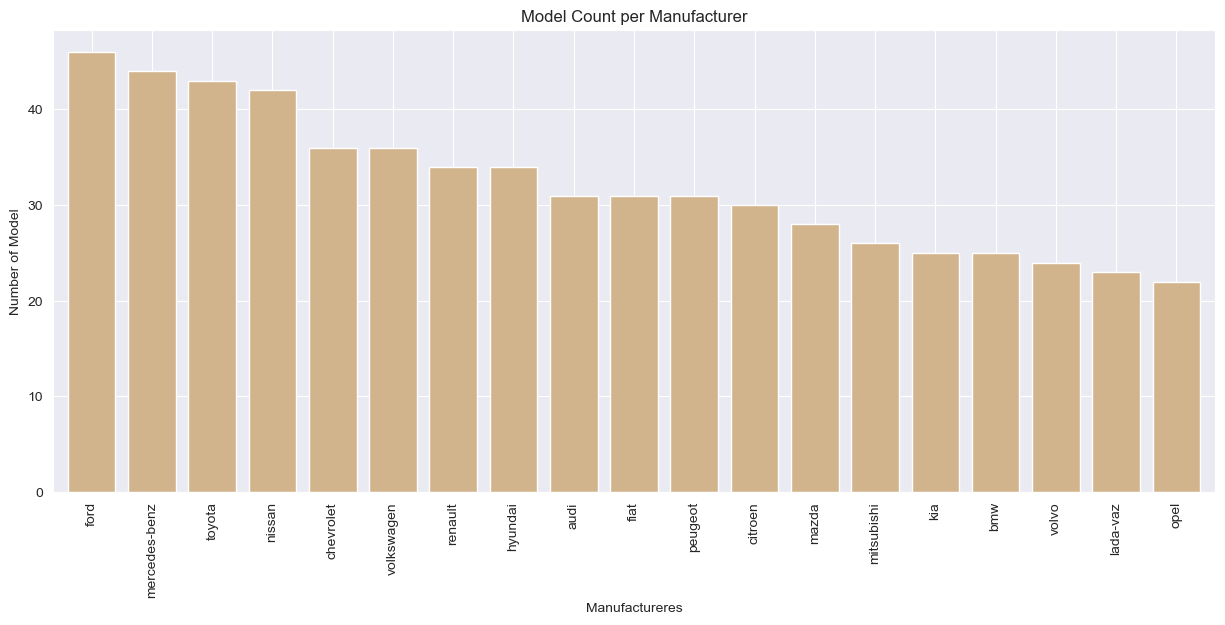

In [28]:
plt.figure(figsize=(15,6))
train.groupby(['make'])['model'].nunique()\
        .sort_values(ascending=False)\
        .head(19).plot(kind='bar',
                       width=0.79,
                       color='tan')
plt.title('Model Count per Manufacturer')
plt.xlabel('Manufactureres')
plt.ylabel('Number of Model')

In [29]:
# Next we will check the count of each model
manuf_model_count = train.groupby(['make','model'])\
            .size()\
            .sort_values(ascending=False)\
            .head(26)\
            .reset_index()\
            .rename(columns={0:'count'})
manuf_model_count

,make,model,count
0,volkswagen,passat,2086
1,bmw,5-seriya,1476
2,audi,a6,1276
3,volkswagen,golf,1070
4,opel,astra,1013
5,mercedes-benz,e-klass,988
6,bmw,3-seriya,823
7,opel,vectra,815
8,renault,laguna,768
9,ford,mondeo,731


In [30]:
model_mean_price = train.groupby(['make','model']).agg({'year':"count","priceUSD":'mean'}).sort_values(by='year',ascending=False).head(26).reset_index()

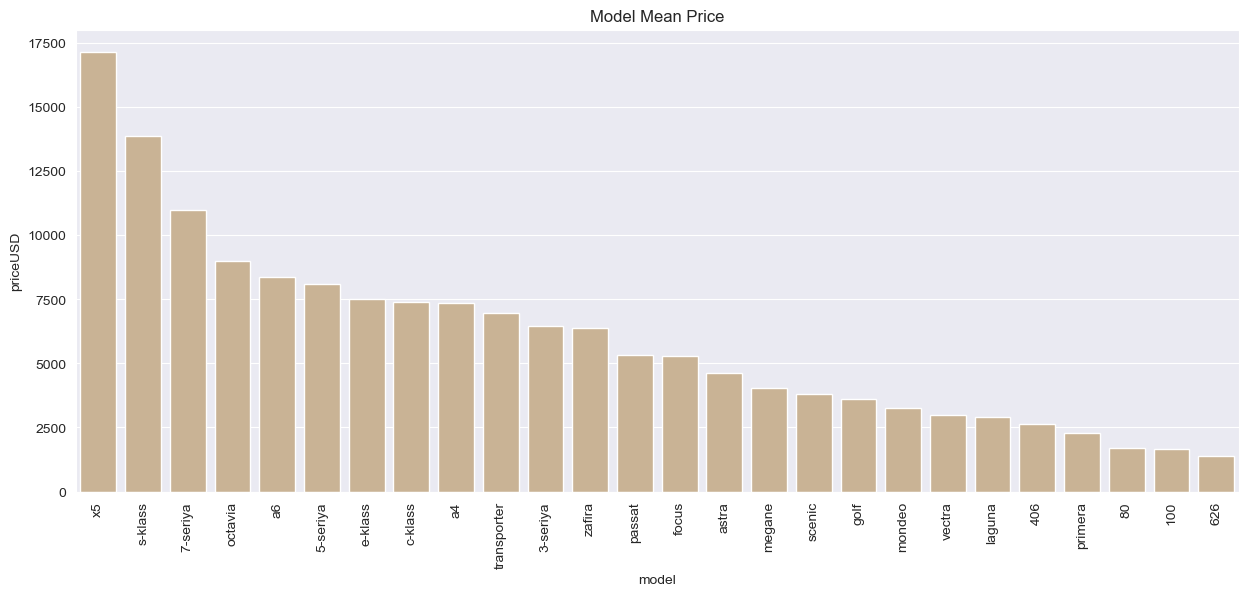

In [31]:
plt.figure(figsize=(15,6))
sns.barplot(data=model_mean_price.sort_values(by="priceUSD",ascending=False),x='model',y="priceUSD",color='tan')
plt.title('Model Mean Price')
plt.xticks(rotation='vertical')
plt.show()

we will have to take the most frequent make and thier model and set others as "other" we should do it later


In [32]:
train

,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment
0,mazda,2,5500,2008,with mileage,162000.0,petrol,1500.0,burgundy,mechanics,front-wheel drive,B
1,mazda,2,5350,2009,with mileage,120000.0,petrol,1300.0,black,mechanics,front-wheel drive,B
2,mazda,2,7000,2009,with mileage,61000.0,petrol,1500.0,silver,auto,front-wheel drive,B
3,mazda,2,3300,2003,with mileage,265000.0,diesel,1400.0,white,mechanics,front-wheel drive,B
4,mazda,2,5200,2008,with mileage,97183.0,diesel,1400.0,gray,mechanics,front-wheel drive,B
...,...,...,...,...,...,...,...,...,...,...,...,...
56239,lancia,zeta,3650,2000,with mileage,290000.0,petrol,2000.0,other,mechanics,front-wheel drive,M
56240,lancia,zeta,4100,1999,with mileage,340000.0,diesel,2100.0,blue,mechanics,front-wheel drive,M
56241,lancia,zeta,3600,1997,with mileage,354000.0,diesel,2100.0,burgundy,mechanics,front-wheel drive,M
56242,lancia,zeta,3000,1997,with mileage,350000.0,petrol,2000.0,blue,mechanics,front-wheel drive,M


Now we will look at year colums

In [33]:
# Univariate analysis of year column
train.year.describe()

count    56244.000000
mean      2003.454840
std          8.144247
min       1910.000000
25%       1998.000000
50%       2004.000000
75%       2010.000000
max       2019.000000
Name: year, dtype: float64

<Axes: xlabel='year'>

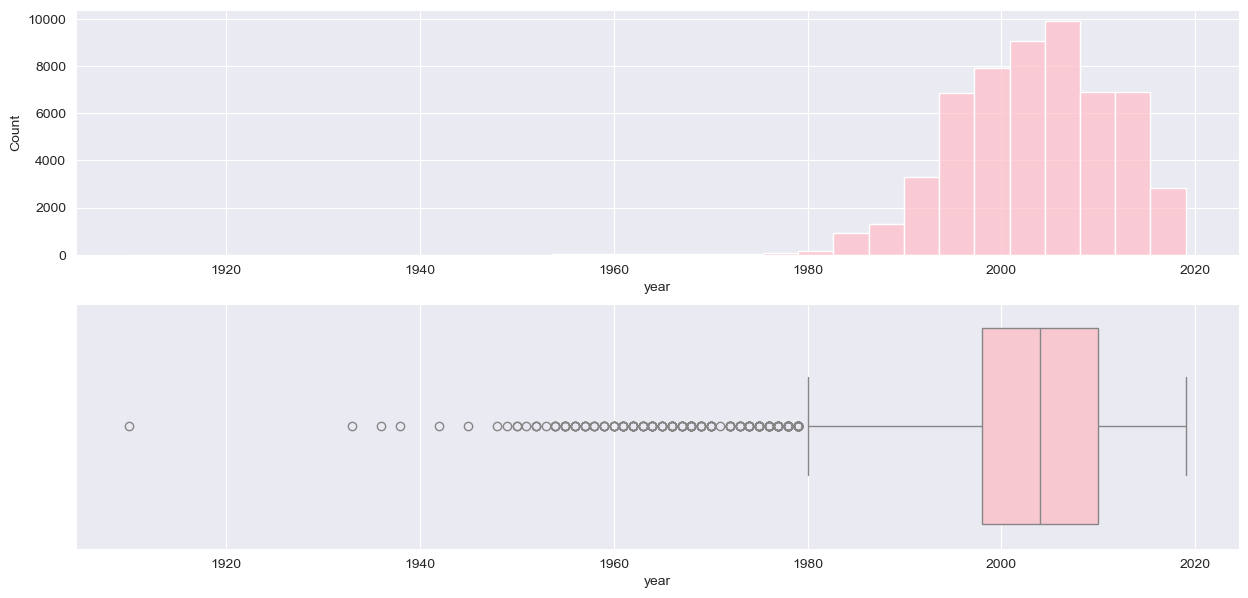

In [34]:
fig, ax =plt.subplots(2,1,figsize=(15,7))
x = train['year']


sns.histplot(x=x,ax=ax[0],bins=30,color="pink")

sns.boxplot(x=x,ax=ax[1],color="pink")


In [35]:
np.log(x)

0        7.604894
1        7.605392
2        7.605392
3        7.602401
4        7.604894
           ...   
56239    7.600902
56240    7.600402
56241    7.599401
56242    7.599401
56243    7.598900
Name: year, Length: 56244, dtype: float64

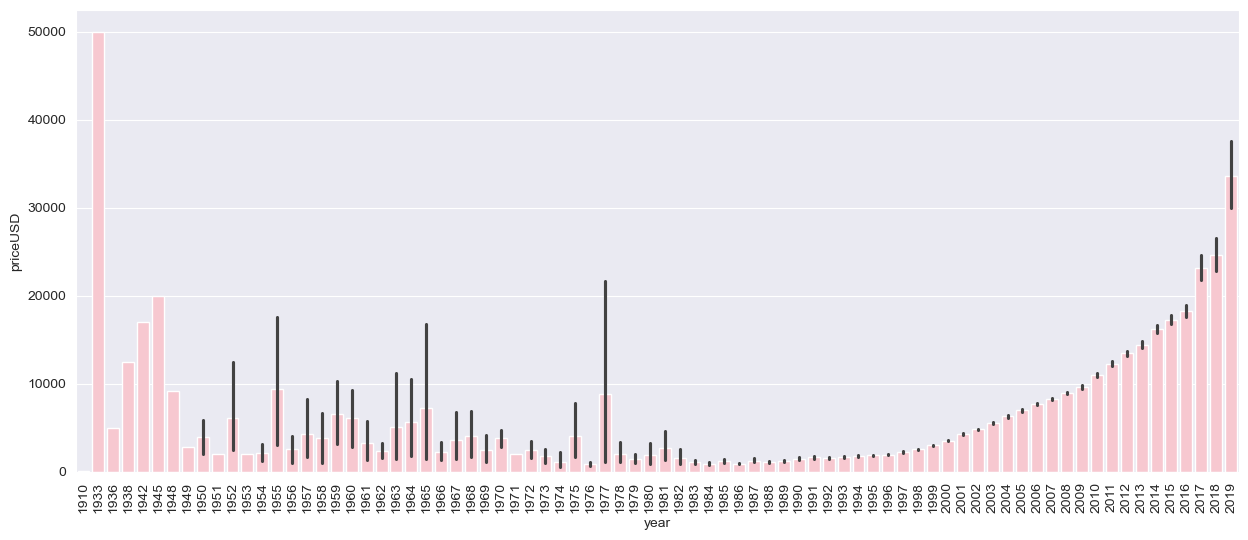

In [36]:
# By variate analysis
plt.figure(figsize=(15,6))
sns.barplot(data=train,x='year',y='priceUSD',color='pink')
plt.xticks(rotation='vertical')
plt.show()

In [37]:
# There is very higher varience only less info about cars under 1983
# So we are going to drop all the cars under 1983
train.drop(train.query('year<1983').index,inplace=True)

In [38]:
train.shape

(55833, 12)

Text(0, 0.5, 'count')

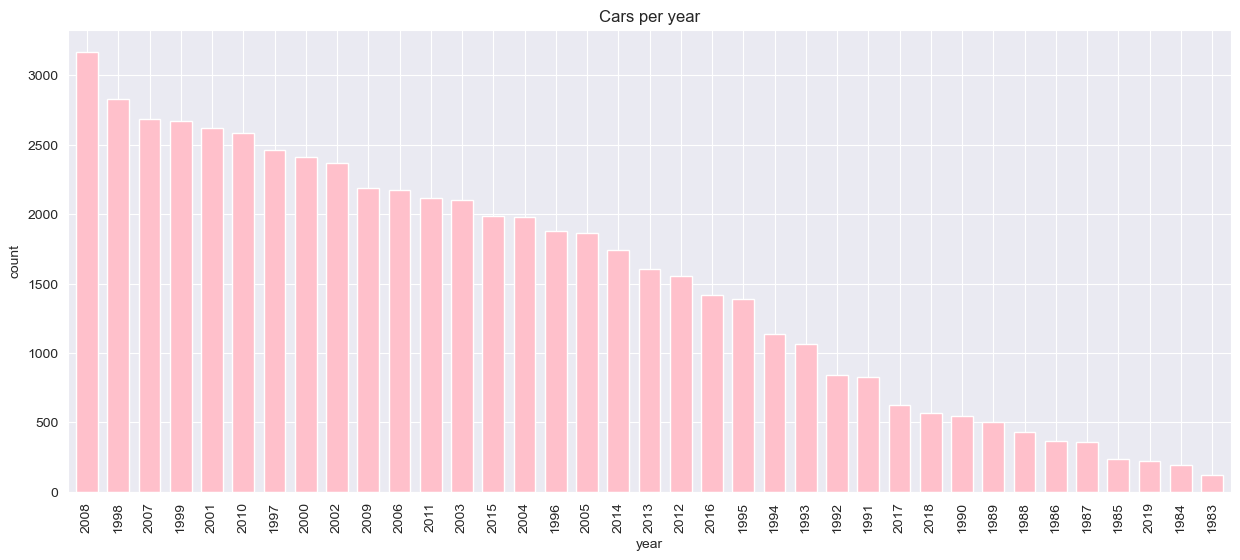

In [39]:
# Check the count of the cars in each year
plt.figure(figsize=(15,6))
train.year.value_counts().plot(kind='bar',color='pink',width=.7)
plt.title('Cars per year')
plt.ylabel('count')

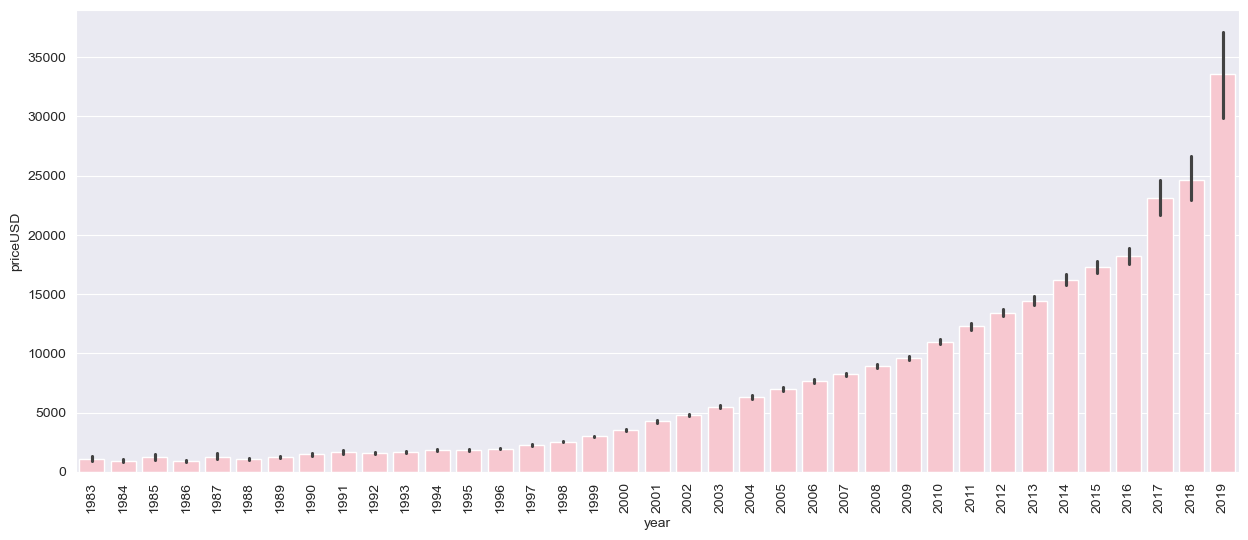

In [40]:
# By variate analysis
plt.figure(figsize=(15,6))
sns.barplot(data=train,x='year',y='priceUSD',color='pink')
plt.xticks(rotation='vertical')
plt.show()

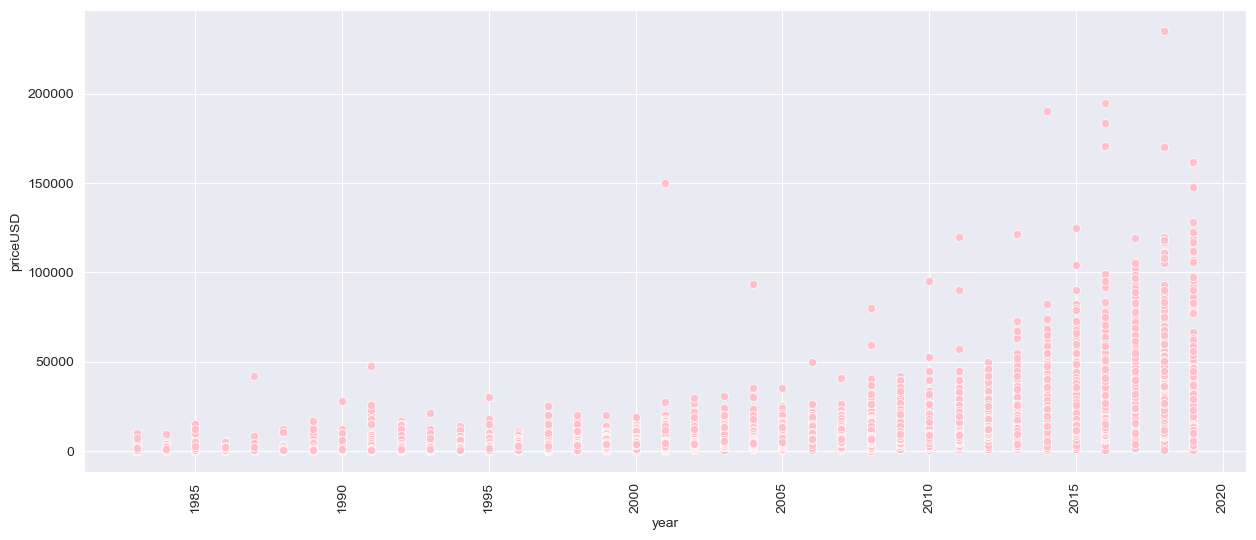

In [41]:
plt.figure(figsize=(15,6))
sns.scatterplot(data=train,x='year',y='priceUSD',color='pink')
plt.xticks(rotation='vertical')
plt.show()

In [42]:
# There is an clear outlier who is year is below 2006 and price is above 150000
# if it is in train data we will remove it

In [43]:
# We try to create bins from this 
print('Correlation between Year with target columns :',train.corr(numeric_only=True)['year']['priceUSD'])

Correlation between Year with target columns : 0.6307627236008172


In [44]:
# It is literally a great column we can for model so we will add the coluns to our model column list
cols_model.append('year')

<Axes: ylabel='count'>

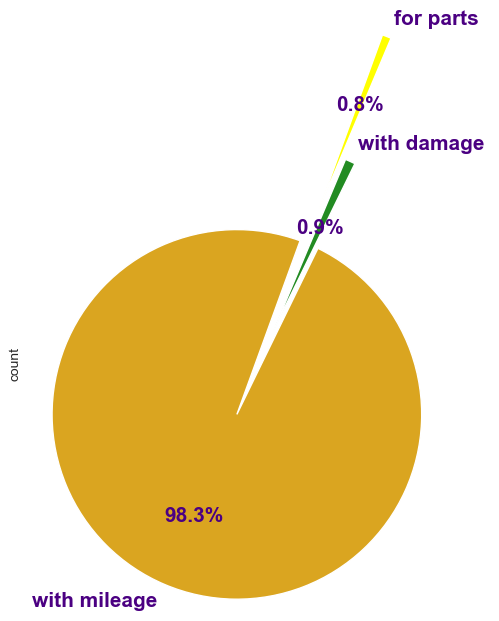

In [45]:
# Next we are going to analyse the the condition column
plt.figure(figsize=(16,6))
train.condition.value_counts().plot(kind='pie', explode=(.3,.2,.9), autopct='%1.1f%%', startangle=70, textprops={'color':"indigo", 'fontsize': 15, 'weight':"bold"},colors=['goldenrod','forestgreen','yellow'])

98% percentage of the data contain with mileage ,this will make the useless , we check the diffrenct between the the catogories with price then we should treat the feature accordingly 

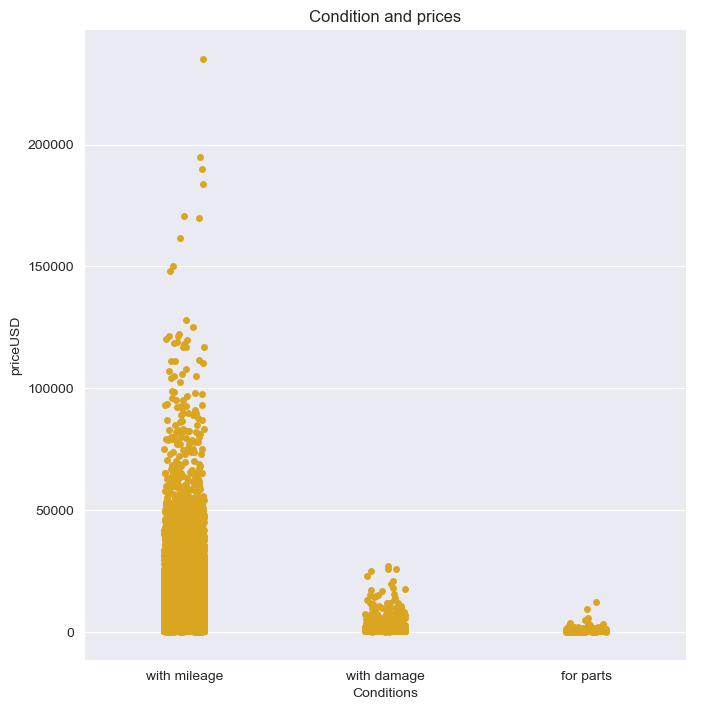

In [46]:
sns.catplot(train,x='condition',y='priceUSD',height=7,color='goldenrod')
plt.title('Condition and prices')
plt.xlabel('Conditions')
plt.show()

In [47]:
# Clearly show the diffrence we can now create a column that tell weather the car is with mileage or not

In [48]:
train['condition_w_Mileage'] = np.where(train['condition']=='with mileage',1,0)

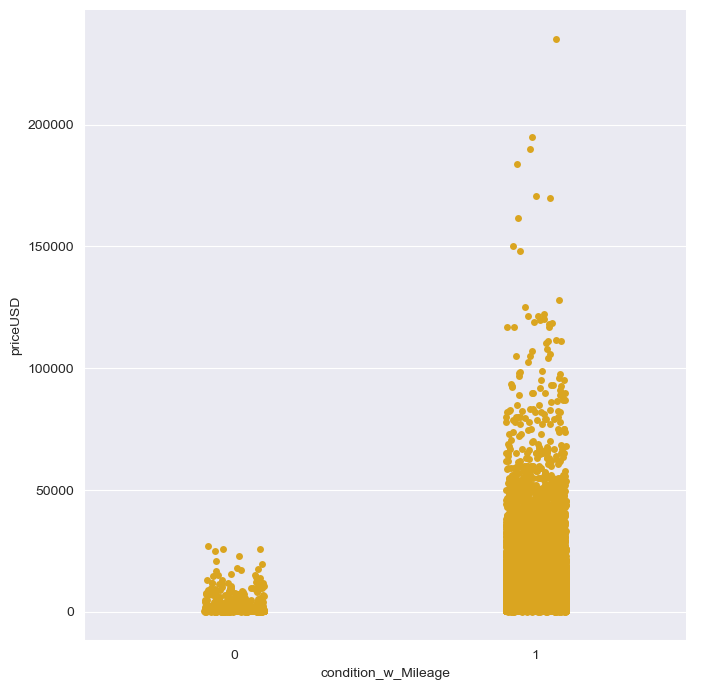

In [49]:
sns.catplot(train,x='condition_w_Mileage',y='priceUSD',height=7,color='goldenrod')

this column will be pretty usefull so keep it and the condition column will be not much so we are adding it into the dropping list


In [50]:
cols_model.append('condition_w_Mileage')

In [51]:
cols_to_drop.append('condition')

In [52]:
# Univariate analysis of Mileage in kilometers
train['mileage(kilometers)'].describe()

count    5.583300e+04
mean     2.448294e+05
std      3.198428e+05
min      0.000000e+00
25%      1.380000e+05
50%      2.300000e+05
75%      3.100000e+05
max      9.999999e+06
Name: mileage(kilometers), dtype: float64

In [53]:
# There is 0 value there is that the values of vehicles that have condition not with mileage let's check that....
train[train.condition_w_Mileage==0].sample(3)
# Ok so that's not the case huh....


,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment,condition_w_Mileage
24117,ford,escort,300,1996,with damage,370000.0,petrol,1400.0,blue,mechanics,front-wheel drive,C,0
46968,lifan,solano,1590,2014,with damage,150000.0,petrol,1600.0,black,mechanics,front-wheel drive,NaN,0
46660,toyota,sienna,5704,2005,with damage,321868.0,petrol,3300.0,black,auto,front-wheel drive,NaN,0


c:\Users\VICTUS\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


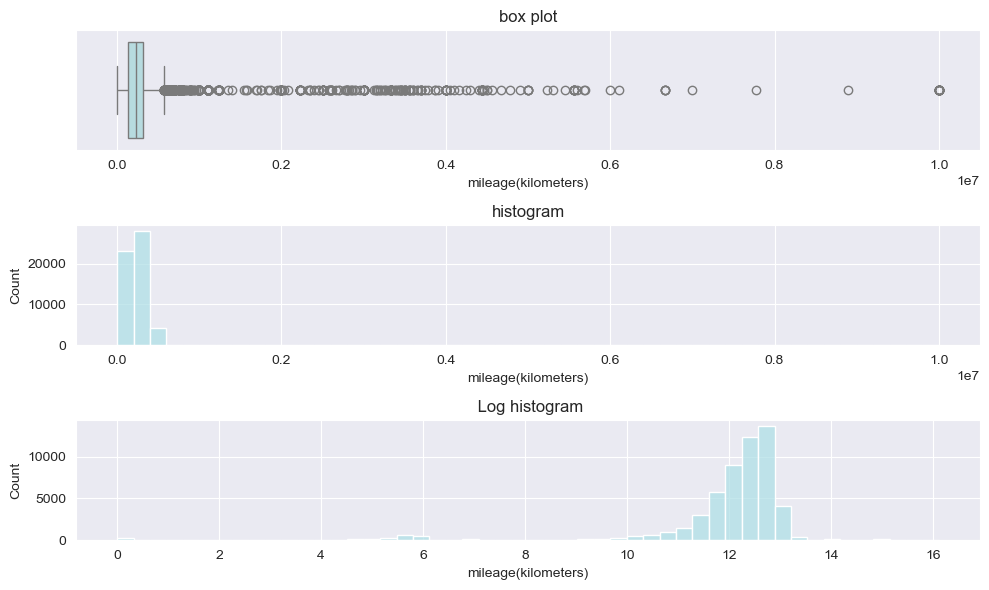

In [54]:
# Then we have no way just look at the distribution of data

fig, ax =plt.subplots(3,1,figsize=(10,6))
x = train['mileage(kilometers)']


sns.boxplot(x=x,ax=ax[0],color='powderblue')
ax[0].set_title('box plot')

sns.histplot(x=x,ax=ax[1],color='powderblue',bins=50)
ax[1].set_title('histogram')

sns.histplot(x=np.log(x),ax=ax[2],color='powderblue',bins=50)
ax[2].set_title(' Log histogram')

plt.tight_layout()

In [55]:
# like we said earlier there are some mileage that is 0 let's check that data
train[train['mileage(kilometers)']==0]

,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment,condition_w_Mileage
184,mazda,3,5500,2007,with mileage,0.0,petrol,1600.0,silver,mechanics,front-wheel drive,C,1
809,renault,19,209,1991,for parts,0.0,petrol,1700.0,brown,mechanics,front-wheel drive,C,0
910,renault,21,500,1992,with mileage,0.0,diesel,1900.0,red,mechanics,front-wheel drive,D,1
1009,uaz,31,1300,1994,with mileage,0.0,petrol,2400.0,gray,mechanics,part-time four-wheel drive,NaN,1
1376,audi,80,1350,1988,with mileage,0.0,petrol,1800.0,white,mechanics,front-wheel drive,D,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
55084,citroen,xsara,1700,1999,with mileage,0.0,petrol,1800.0,silver,mechanics,front-wheel drive,C,1
55523,toyota,yaris,3400,2004,with mileage,0.0,petrol,1000.0,silver,mechanics,front-wheel drive,B,1
55638,opel,zafira,4450,2002,with mileage,0.0,diesel,2000.0,black,mechanics,front-wheel drive,M,1
55711,opel,zafira,4100,2002,with mileage,0.0,diesel,2200.0,gray,mechanics,front-wheel drive,M,1


In [56]:
median_mileage = train['mileage(kilometers)'].median()
no_zero_mileage = train['mileage(kilometers)'].replace({0:median_mileage})

In [57]:
removed_lesser_values= np.where(train['mileage(kilometers)']<120,median_mileage,train['mileage(kilometers)'])

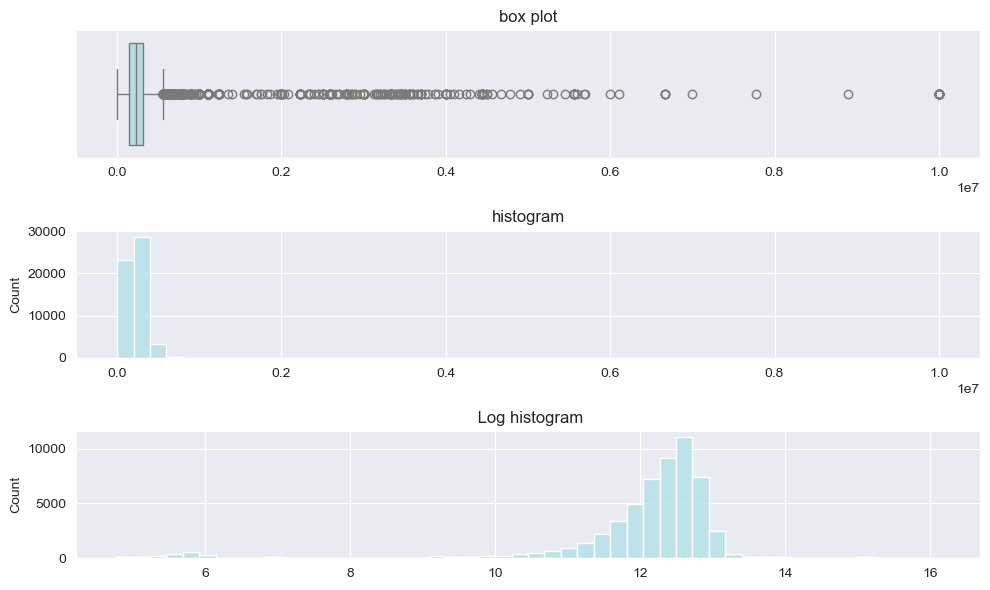

In [58]:
# Then we have no way just look at the distribution of data

fig, ax =plt.subplots(3,1,figsize=(10,6))
x = removed_lesser_values


sns.boxplot(x=x,ax=ax[0],color='powderblue')
ax[0].set_title('box plot')

sns.histplot(x=x,ax=ax[1],color='powderblue',bins=50)
ax[1].set_title('histogram')

sns.histplot(x=np.log(x),ax=ax[2],color='powderblue',bins=50)
ax[2].set_title(' Log histogram')

plt.tight_layout()

In [59]:
# Look how the target is related with this
train.corr(numeric_only=True)['mileage(kilometers)']

priceUSD              -0.172679
year                  -0.256549
mileage(kilometers)    1.000000
volume(cm3)            0.013538
condition_w_Mileage   -0.029912
Name: mileage(kilometers), dtype: float64

In [60]:
train[train["mileage(kilometers)"] > 2000000].sample(10)

,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment,condition_w_Mileage
55177,citroen,xsara,2450,1998,with mileage,2620000.0,petrol,1400.0,yellow,mechanics,front-wheel drive,C,1
40257,proton,persona,650,1996,with mileage,2222222.0,petrol,1300.0,green,mechanics,front-wheel drive,NaN,1
24395,citroen,evasion,3200,1999,with mileage,4444444.0,diesel,1900.0,silver,mechanics,front-wheel drive,M,1
11699,audi,a4,3000,1996,with mileage,9999999.0,petrol,1800.0,red,mechanics,front-wheel drive,D,1
45229,volkswagen,santana,166,1983,with damage,3000000.0,petrol,2000.0,brown,mechanics,front-wheel drive,NaN,0
36926,opel,omega,400,1987,with mileage,9999999.0,petrol,2000.0,blue,mechanics,rear drive,E,1
38924,volkswagen,passat,600,1990,with mileage,3452765.0,diesel,1600.0,blue,mechanics,front-wheel drive,D,1
31592,renault,laguna,1000,2000,with mileage,2345565.0,petrol,1800.0,silver,mechanics,front-wheel drive,D,1
2084,audi,100,1100,1988,with mileage,3000000.0,petrol,2300.0,silver,mechanics,front-wheel drive,E,1
4586,peugeot,407,4100,2005,with mileage,3000000.0,diesel,1600.0,white,mechanics,front-wheel drive,D,1


In [61]:
# Wokey there are some values that i guess like 99999999 or 7777777 we will drop such values after split the data
# we still ha

<Axes: ylabel='count'>

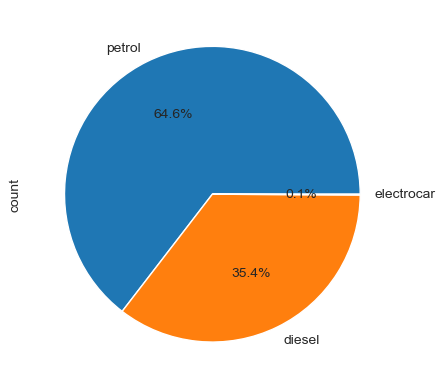

In [62]:

train.fuel_type.value_counts().plot.pie(autopct='%1.1f%%')

<Axes: xlabel='fuel_type', ylabel='priceUSD'>

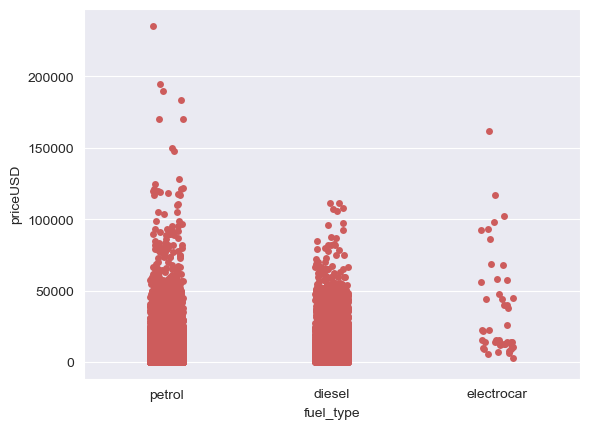

In [63]:
sns.stripplot(data=train,x='fuel_type',y='priceUSD',color='indianred')

In [64]:
# well since it only contain 42 electrocar this wil leads to bias 
# so we are dropping all electrocar
electro_cars = train.query('fuel_type == "electrocar"').index
train.drop(electro_cars,inplace=True)

<Axes: xlabel='fuel_type', ylabel='priceUSD'>

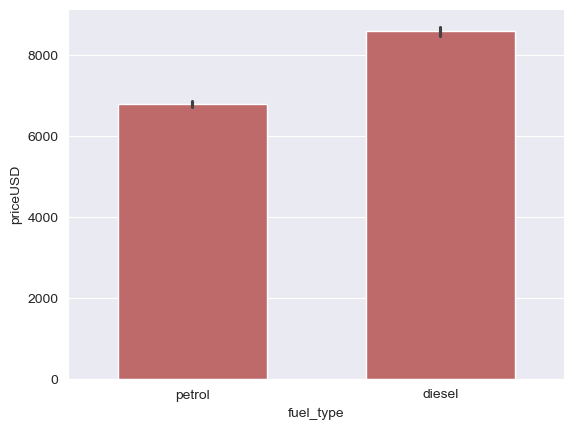

In [65]:
sns.barplot(data=train,x='fuel_type',y='priceUSD',color='indianred',width=.6)

In [66]:
# We can see the diecel fuel type have small impact on the price we will keep it 
cols_model.append('fuel_type')

In [67]:
# Now What is volume 
train['volume(cm3)'].describe()


count    55786.000000
mean      2105.927258
std        957.069336
min        500.000000
25%       1600.000000
50%       1997.000000
75%       2300.000000
max      20000.000000
Name: volume(cm3), dtype: float64

In [68]:
# Outliers piiii piii outlierrrrsssss

In [69]:
train['volume(cm3)'].nlargest(50)

81       20000.0
354      20000.0
1537     20000.0
1768     20000.0
4573     20000.0
4816     20000.0
5369     20000.0
5553     20000.0
5607     20000.0
5908     20000.0
8803     20000.0
16098    20000.0
20494    20000.0
22362    20000.0
29990    20000.0
31150    20000.0
32502    20000.0
34153    20000.0
34976    20000.0
36100    20000.0
37056    20000.0
41058    20000.0
41322    20000.0
41329    20000.0
41761    20000.0
42800    20000.0
45930    20000.0
47229    20000.0
49091    20000.0
50712    20000.0
50723    20000.0
55205    20000.0
56208    20000.0
19236    19999.0
3930     19000.0
4244     19000.0
11717    19000.0
13970    19000.0
14896    19000.0
20860    19000.0
31723    19000.0
34141    19000.0
45764    19000.0
49922    19000.0
52597    19000.0
2144     18000.0
5645     18000.0
16757    18000.0
21774    18000.0
24102    18000.0
Name: volume(cm3), dtype: float64

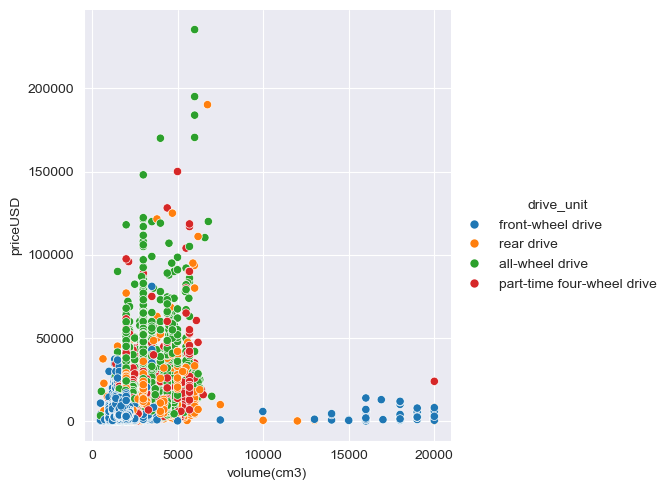

In [70]:
sns.relplot(x=train['volume(cm3)'],y=train['priceUSD'],hue=train.drive_unit)

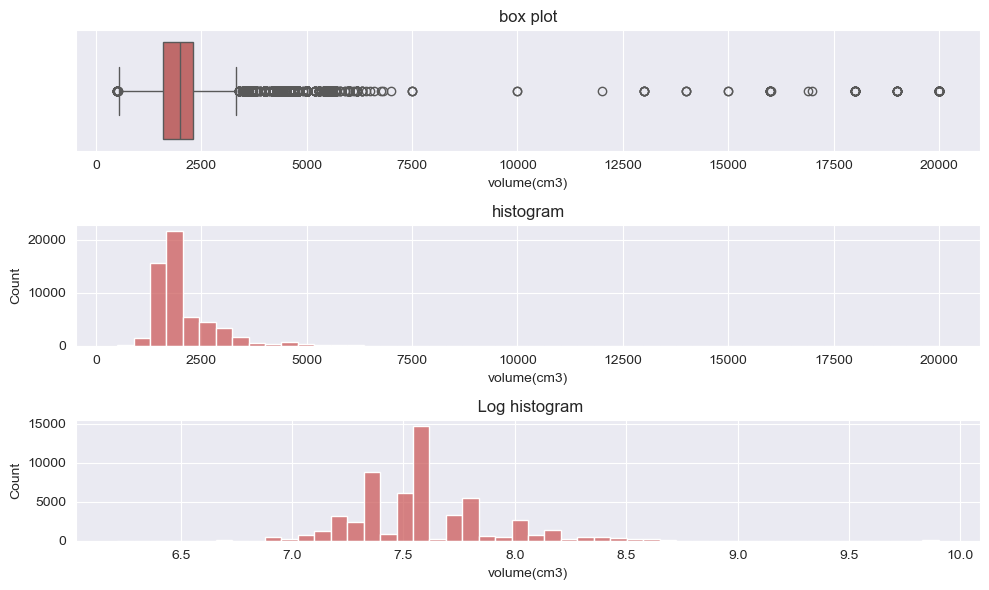

In [71]:
# Then we have no way just look at the distribution of data

fig, ax =plt.subplots(3,1,figsize=(10,6))
x = train['volume(cm3)']


sns.boxplot(x=x,ax=ax[0],color='indianred')
ax[0].set_title('box plot')

sns.histplot(x=x,ax=ax[1],color='indianred',bins=50)
ax[1].set_title('histogram')

sns.histplot(x=np.log(x),ax=ax[2],color='indianred',bins=50)
ax[2].set_title(' Log histogram')

plt.tight_layout()

In [72]:
# i don't know why but ther are some value that goes beyonnd 1000 we should check how many of them and deal with them accordingly
train[train['volume(cm3)']>7000]

,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment,condition_w_Mileage
81,mazda,3,5300,2006,with mileage,168000.0,petrol,20000.0,silver,mechanics,front-wheel drive,C,1
354,mazda,6,7500,2003,with mileage,240000.0,diesel,20000.0,silver,mechanics,front-wheel drive,D,1
929,renault,21,200,1990,for parts,300.0,petrol,16000.0,other,mechanics,front-wheel drive,D,0
1537,audi,80,2900,1993,with mileage,392432.0,petrol,20000.0,burgundy,mechanics,front-wheel drive,D,1
1768,audi,100,2150,1992,with mileage,300000.0,petrol,20000.0,silver,mechanics,front-wheel drive,E,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52597,opel,vivaro,7500,2004,with mileage,300000.0,diesel,19000.0,silver,mechanics,NaN,M,1
54036,citroen,xantia,1900,1999,with mileage,0.0,petrol,18000.0,blue,mechanics,NaN,D,1
54869,mazda,xedos-6,2000,1997,with mileage,246000.0,petrol,16000.0,other,mechanics,front-wheel drive,NaN,1
55205,citroen,xsara,3000,2001,with mileage,386000.0,diesel,20000.0,red,mechanics,front-wheel drive,C,1


I think it's better to remove these guys cuz all other point giveing a good positinve relation with target column we will do after the train test split

In [73]:
cols_model.append('volume(cm3)')

### Color analysis

In [74]:
# Now let's look at the color
# Check how many unique colors are there
print('Number of uniqu colors:',train.color.nunique())

Number of uniqu colors: 13


In [75]:
train.color.value_counts()

color
black       12345
silver      10062
blue         8016
gray         5774
white        5234
green        3818
other        3350
red          2702
burgundy     2010
brown        1338
purple        625
yellow        297
orange        215
Name: count, dtype: int64

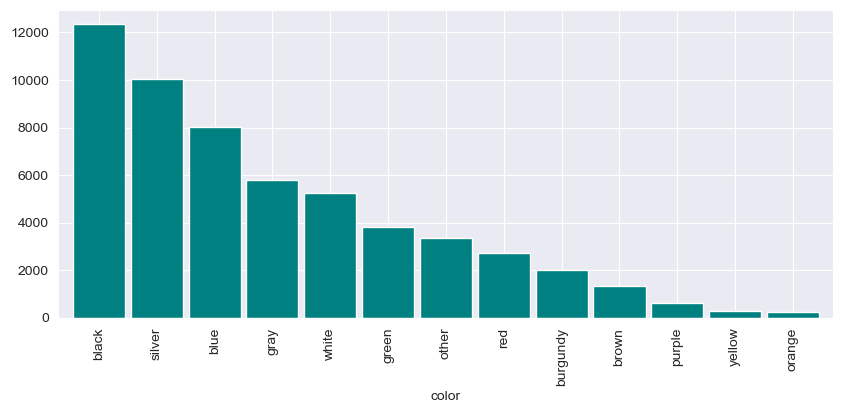

In [76]:
plt.figure(figsize=(10,4))
train.color.value_counts().plot(kind='bar',color='teal',width=.9)
plt.show()

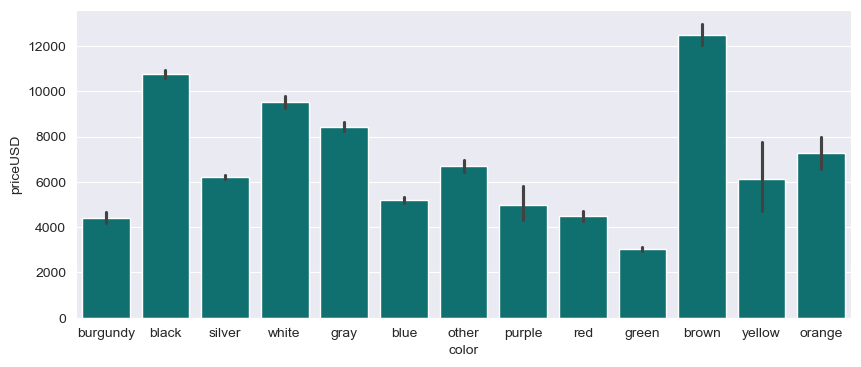

In [77]:
plt.figure(figsize=(10,4))
sns.barplot(x=train['color'],y=train['priceUSD'],color='teal')
plt.show()

In [78]:
cols_model.append('color')

### transmission analysis

In [79]:
train.transmission.unique()

array(['mechanics', 'auto'], dtype=object)

In [80]:
train['transmission'].value_counts()

transmission
mechanics    35654
auto         20132
Name: count, dtype: int64

Text(0.5, 1.0, 'Boxplot of transmission')

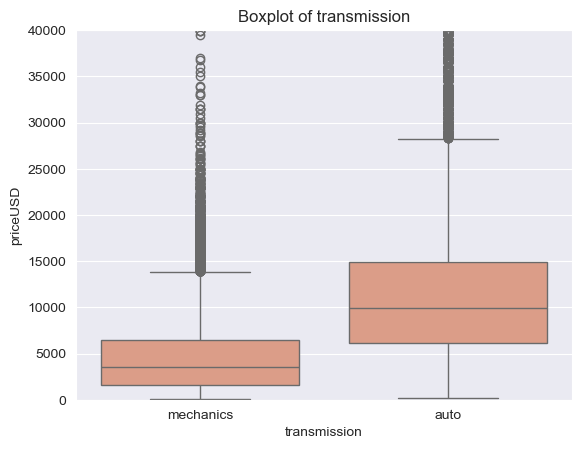

In [81]:
sns.boxplot(data=train,y = 'priceUSD',x='transmission',color='darksalmon')
plt.ylim(0,40000)
plt.title('Boxplot of transmission')

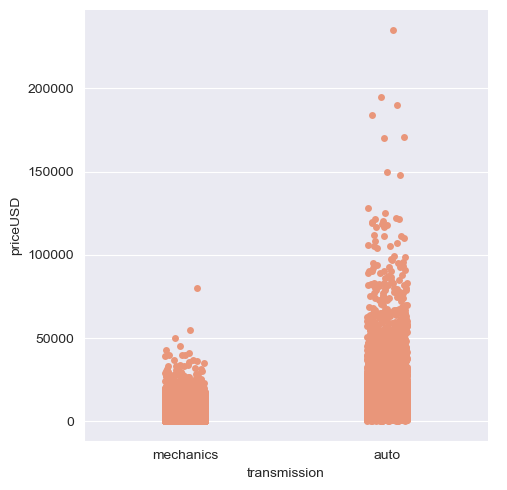

In [82]:
sns.catplot(data=train,y = 'priceUSD',x='transmission',color='darksalmon')

In [83]:
cols_model.append('transmission')

### drive unit analysis

<Axes: xlabel='drive_unit'>

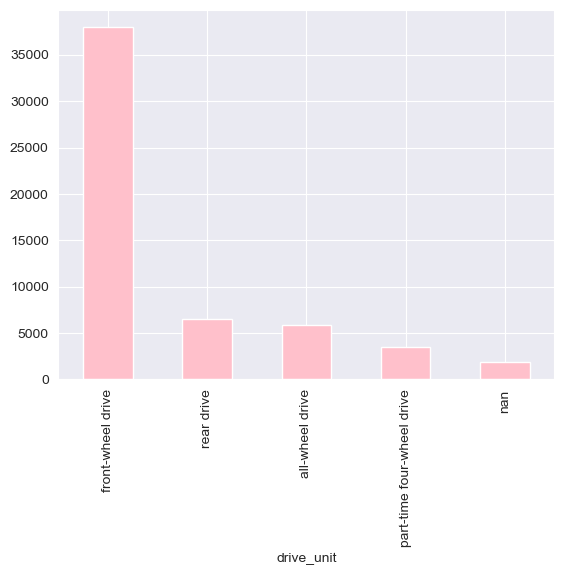

In [84]:
train.drive_unit.value_counts(dropna=False).plot.bar(color='pink')

In [85]:
# will check how the these catogories effect on target column


(0.0, 40000.0)

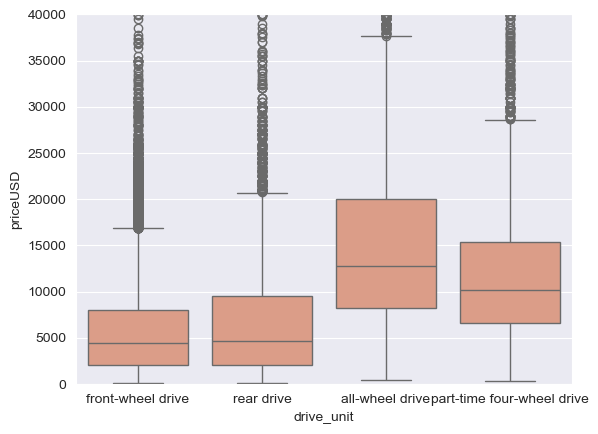

In [86]:
sns.boxplot(data=train,y = 'priceUSD',x='drive_unit',color='darksalmon')
plt.ylim(0,40000)

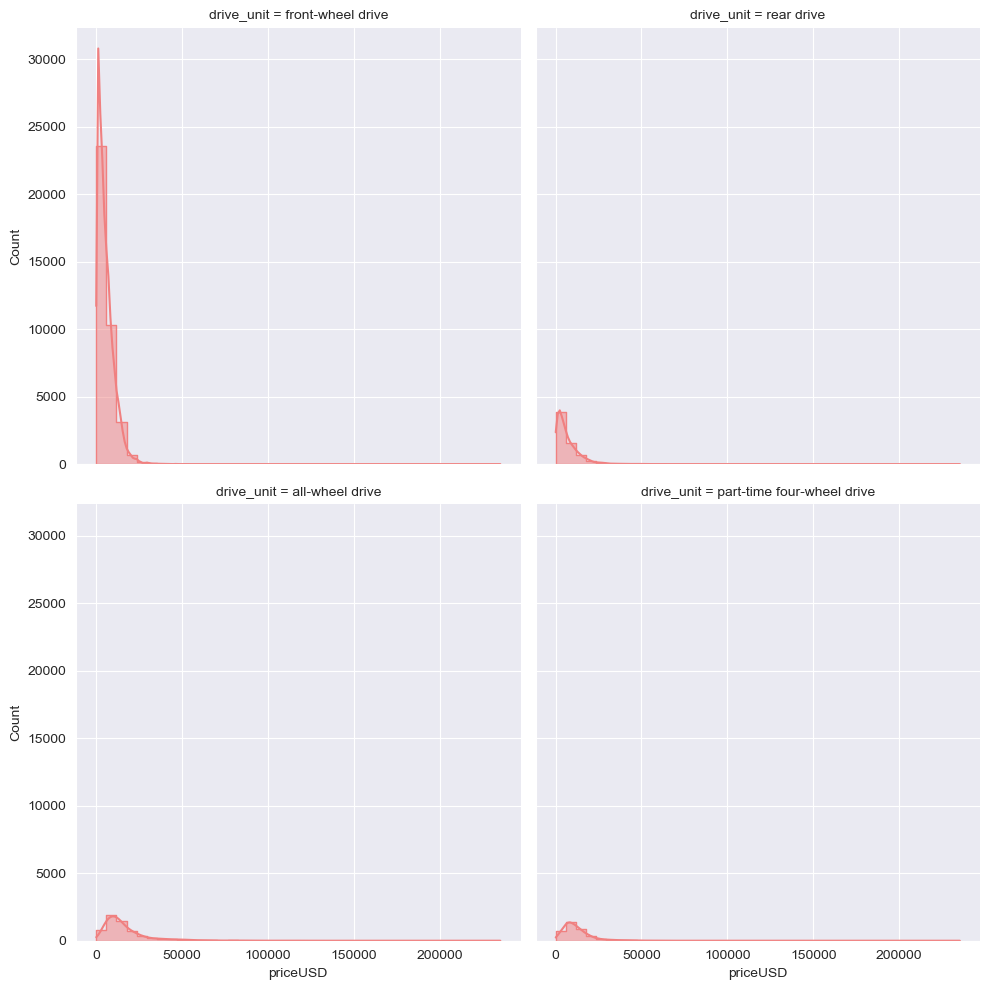

In [87]:
sns.displot(data=train,x='priceUSD',
            col='drive_unit',
            col_wrap=2,
            aspect=1,
            height=5,
            bins=40,
            element='step',
            kde=True,
            color='lightcoral')
plt.tight_layout()

- audi - all wheel drive 

- alfa-romeo - front wheel drive
- bmw 1-seriya -rear drive , 2-seriya-gran-tourer - all wheel ,5-seriya - rear drive mode rear drive

In [88]:
def freq_drive_unit(make,df):
    return df[df['make'] == make]['drive_unit'].mode()

In [89]:
def missing_impute(x):
    if x['drive_unit']==np.nan:
        print('nith')
    print("-"*10)

In [90]:
filled_values = np.where(train['drive_unit'].isnull(),freq_drive_unit(train['make'],train),train['drive_unit'])

In [91]:
train['drive_unit_filled'] = filled_values

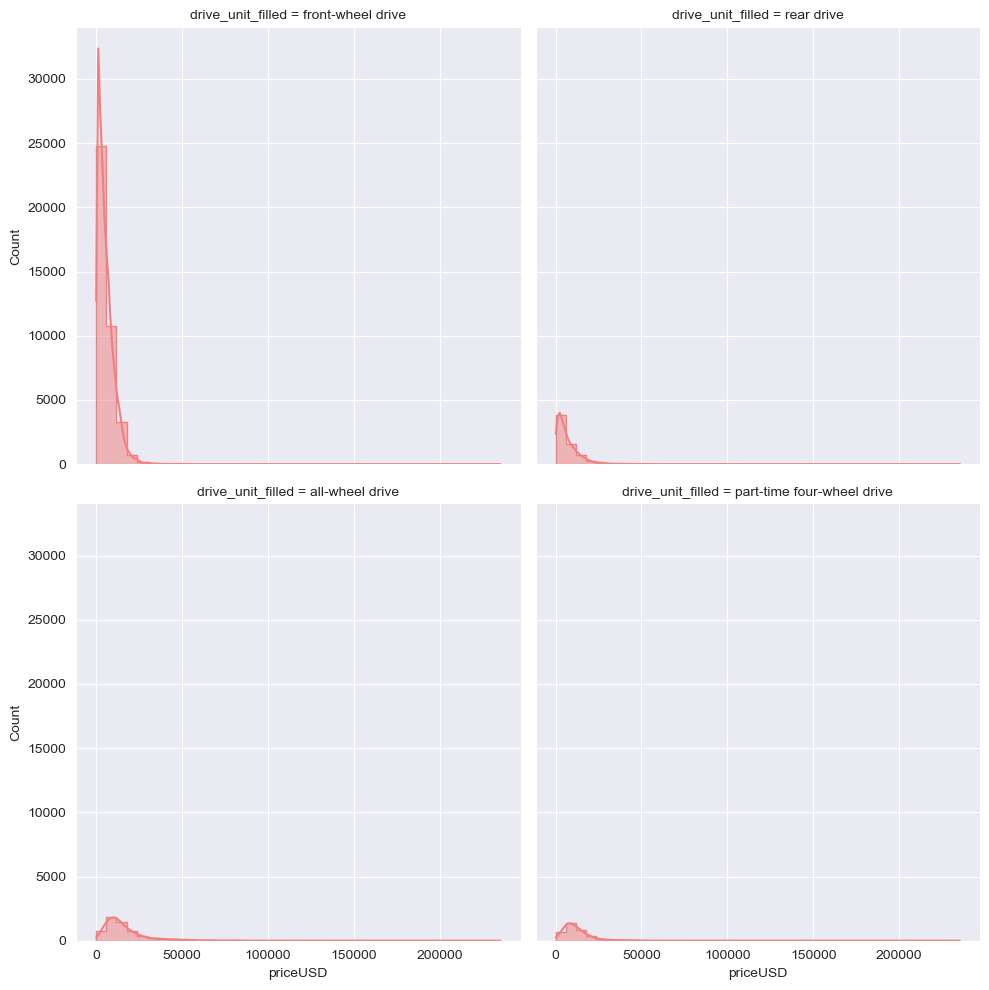

In [92]:
sns.displot(data=train,x='priceUSD',
            col='drive_unit_filled',
            col_wrap=2,
            aspect=1,
            height=5,
            bins=40,
            element='step',
            kde=True,
            color='lightcoral')
plt.tight_layout()

In [93]:
#hmm after imputing missing values the distribution deos not seem to change that much

In [94]:
train.make.nunique()

94

In [95]:
cols_to_drop.append('drive_unit')

In [96]:
train.segment.value_counts()

segment
D    12584
C    10603
J     8598
M     6303
E     6167
B     4287
F      896
S      756
A      452
Name: count, dtype: int64

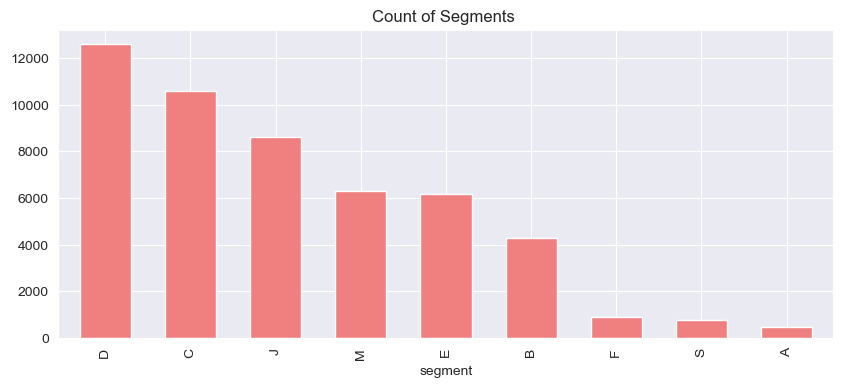

In [97]:
plt.figure(figsize=(10,4))
train.segment.value_counts().plot(kind='bar',color='lightcoral',width=.6)
plt.title('Count of Segments ')
plt.show()

<Figure size 1000x400 with 0 Axes>

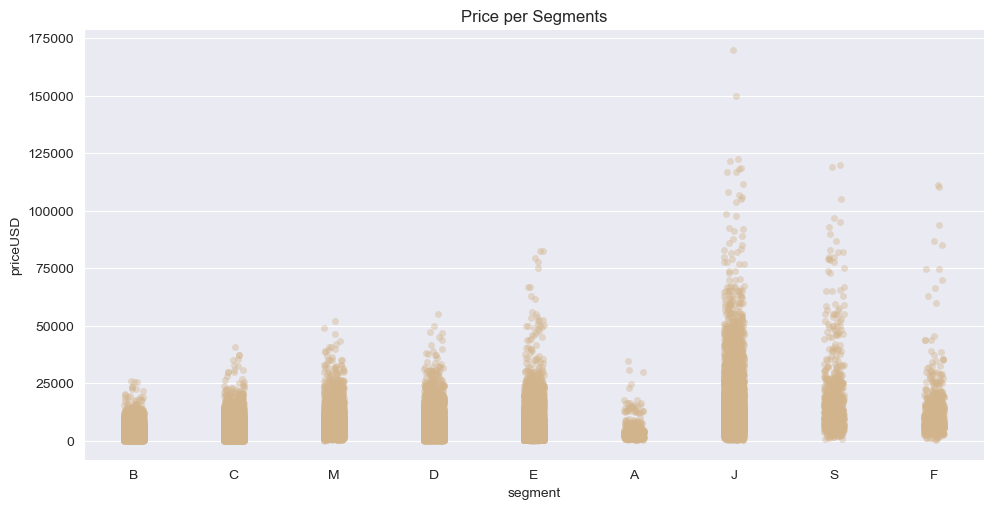

In [98]:
plt.figure(figsize=(10,4))
sns.catplot(data=train,x='segment',y='priceUSD',color='tan',alpha=.4,aspect=2)
plt.title('Price per Segments')
plt.show()

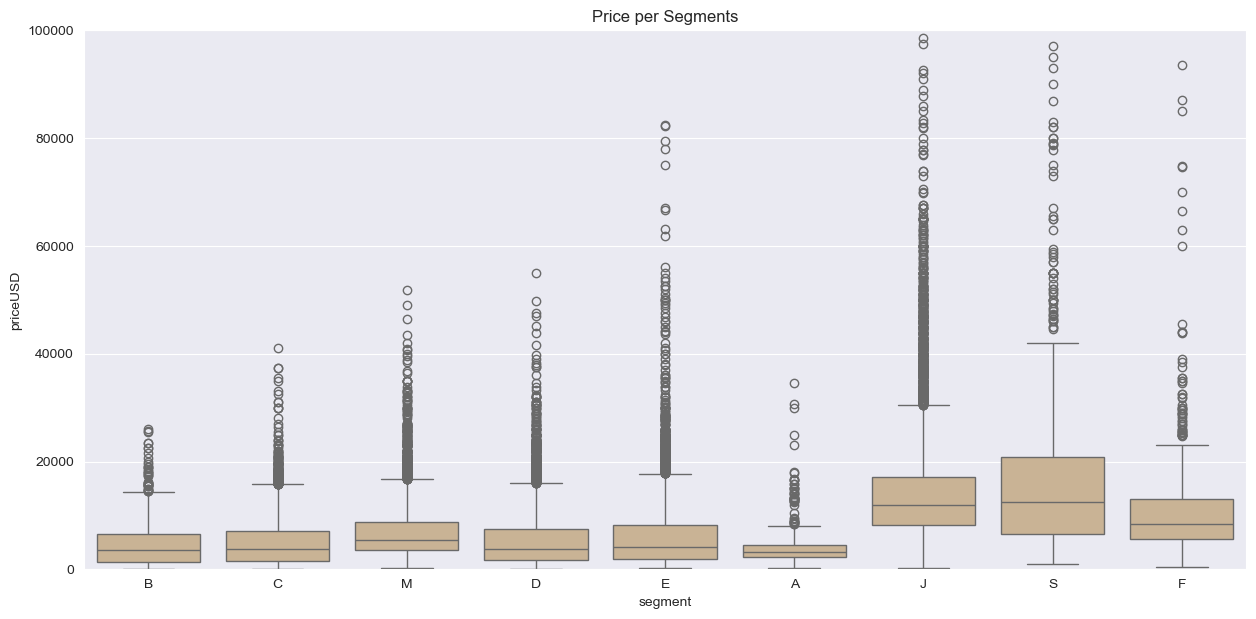

In [99]:
plt.figure(figsize=(15,7))
sns.boxplot(data=train,x='segment',y='priceUSD',color='tan')
plt.title('Price per Segments')
plt.ylim(0,100000)
plt.show()

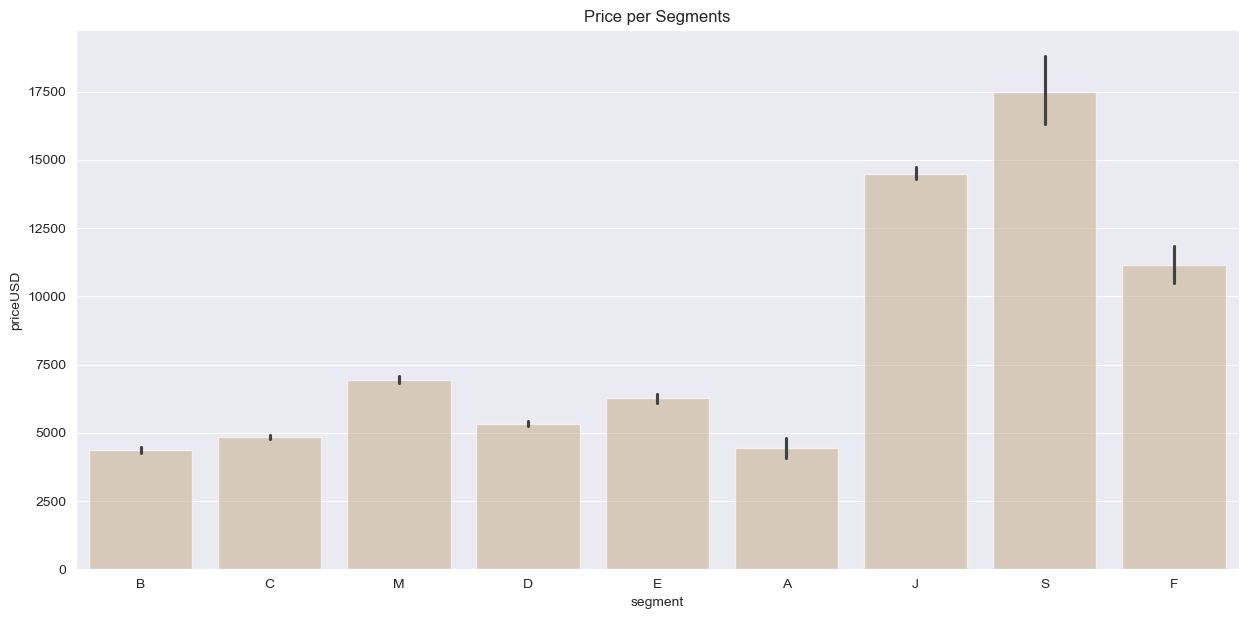

In [100]:
plt.figure(figsize=(15,7))
sns.barplot(data=train,x='segment',y='priceUSD',color='tan',alpha=0.6)
plt.title('Price per Segments')
plt.show()

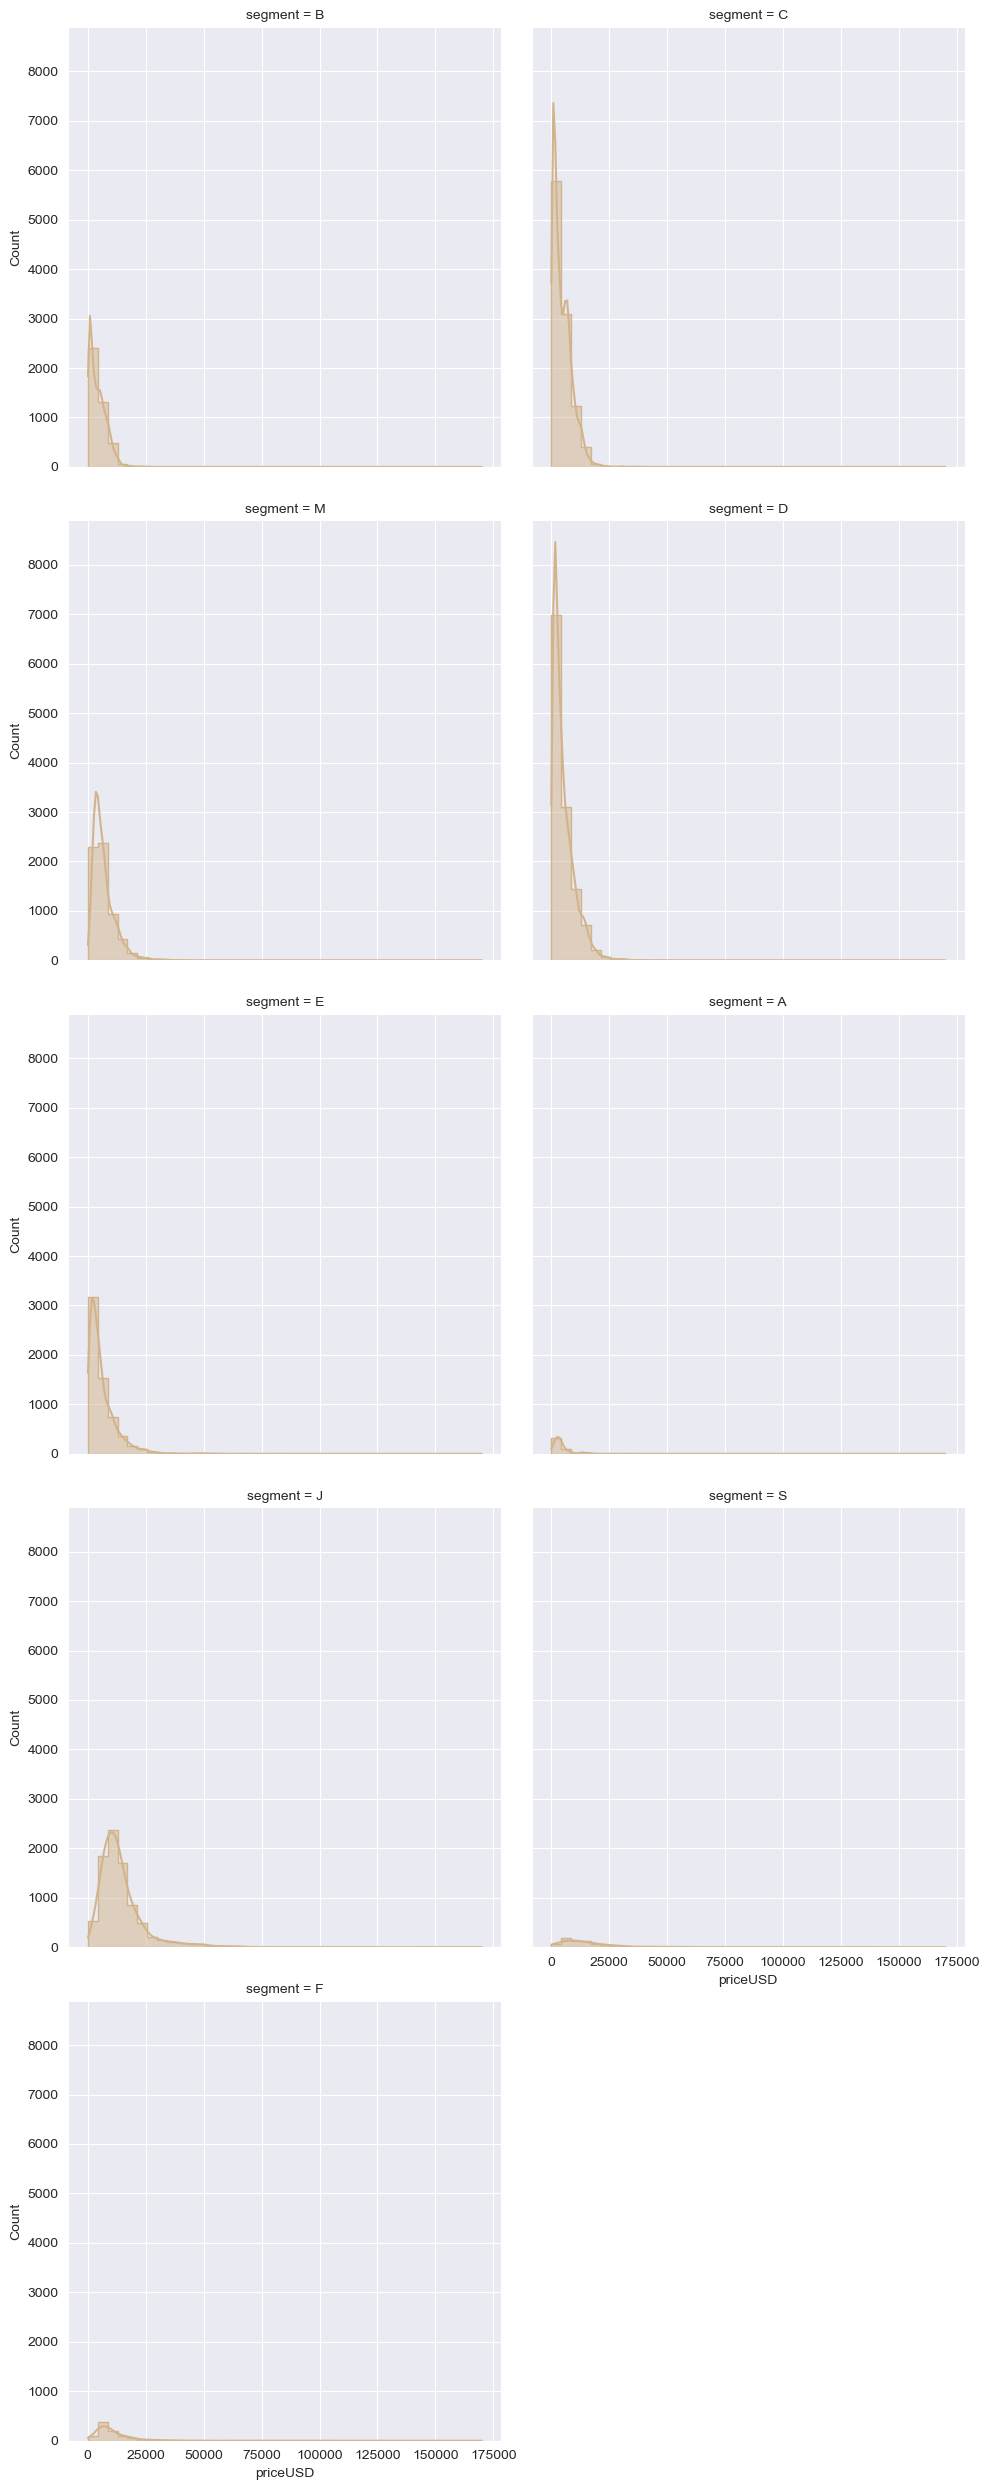

In [101]:
sns.displot(data=train,x='priceUSD',
            col='segment',
            col_wrap=2,
            aspect=1,
            height=5,
            bins=40,
            element='step',
            kde=True,
            color='tan')
plt.tight_layout()

the segment s, f, a are low in count and have similar distribution we can set that three col to one and make it others
segment j and b have higher price comapare to others 

In [102]:
cols_model

['make',
 'year',
 'condition_w_Mileage',
 'fuel_type',
 'volume(cm3)',
 'color',
 'transmission']

In [103]:
train.drop(columns=cols_to_drop,inplace=True)

In [104]:
train.groupby('model')['segment'].unique().apply(len).nlargest()

model
200    2
24     2
25     2
3      2
6      2
Name: segment, dtype: int64

so each model is in some unique segments since there are missing values we will impute it with 'missing' 

In [105]:
train.segment.fillna('unknown',inplace=True)

C:\Users\VICTUS\AppData\Local\Temp\ipykernel_15132\2896960713.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train.segment.fillna('unknown',inplace=True)


In [106]:
train[train['model']=='200']

,make,model,priceUSD,year,mileage(kilometers),fuel_type,volume(cm3),color,transmission,segment,condition_w_Mileage,drive_unit_filled
2441,audi,200,1250,1984,203500.0,petrol,2200.0,blue,mechanics,unknown,1,front-wheel drive
2442,audi,200,1200,1988,223333.0,petrol,2300.0,black,mechanics,unknown,1,all-wheel drive
2443,audi,200,1050,1986,240000.0,petrol,2000.0,silver,mechanics,unknown,1,front-wheel drive
2444,audi,200,1450,1984,250000.0,petrol,2200.0,brown,mechanics,unknown,1,front-wheel drive
2445,audi,200,3300,1990,438185.0,petrol,2200.0,green,mechanics,unknown,1,all-wheel drive
...,...,...,...,...,...,...,...,...,...,...,...,...
2497,rover,200,713,1998,226000.0,petrol,1400.0,blue,mechanics,B,1,front-wheel drive
2498,rover,200,800,1998,317305.0,petrol,1400.0,green,mechanics,B,1,front-wheel drive
2499,rover,200,900,1997,318000.0,petrol,1400.0,green,mechanics,B,1,front-wheel drive
2500,rover,200,1450,1999,325000.0,diesel,2000.0,silver,mechanics,B,1,front-wheel drive


-----
----
Now we will split the data into training and test data and do all the outlier removal and other feature enginearing to traing data

In [107]:
X = train.drop(columns='priceUSD')
y = train['priceUSD']

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [109]:
print("shape of X train and X test data :",X_train.shape,X_test.shape)
print("shape of y train and y test data :",y_train.shape,y_test.shape)

shape of X train and X test data : (44628, 11) (11158, 11)
shape of y train and y test data : (44628,) (11158,)


In [110]:
X_train.columns

Index(['make', 'model', 'year', 'mileage(kilometers)', 'fuel_type',
       'volume(cm3)', 'color', 'transmission', 'segment',
       'condition_w_Mileage', 'drive_unit_filled'],
      dtype='object')

In [111]:
X_train['make_new'] = X_train['make'].apply(lambda x : x if x in most_repeated_make else 'others')

In [112]:
most_freq_models = manuf_model_count['model'].head(20).values

In [113]:
X_train['model_new'] = X_train['model'].apply(lambda x : x if x in most_freq_models else 'others')

In [114]:
X_train['model_new'].value_counts()

model_new
others         31238
passat          1672
5-seriya        1155
a6              1026
golf             856
astra            824
e-klass          745
3-seriya         659
vectra           657
laguna           614
mondeo           588
a4               565
scenic           510
zafira           469
100              467
7-seriya         463
transporter      445
megane           433
x5               418
focus            416
c-klass          408
Name: count, dtype: int64

In [115]:
X_train.drop(columns=['make','model'],inplace=True)

In [116]:
X_train = pd.concat([X_train,y_train],axis=1)

In [117]:
X_train.head()

,year,mileage(kilometers),fuel_type,volume(cm3),color,transmission,segment,condition_w_Mileage,drive_unit_filled,make_new,model_new,priceUSD
51949,1996,222000.00,petrol,1600.0,other,mechanics,D,1,front-wheel drive,opel,vectra,2000
39179,2010,160000.00,petrol,1800.0,white,auto,D,1,front-wheel drive,volkswagen,passat,7200
13969,1994,365000.00,petrol,2000.0,burgundy,mechanics,D,1,front-wheel drive,honda,others,1422
499,2006,210823.54,petrol,2300.0,silver,auto,D,1,front-wheel drive,mazda,others,4400
20757,2006,212432.88,petrol,2400.0,silver,auto,J,1,all-wheel drive,others,others,6000


## outliers detection

In [118]:
# iam going to remove all the price beyond 1000000
X_train.drop(X_train.query('priceUSD>100000').index,inplace=True)

<Axes: ylabel='mileage(kilometers)'>

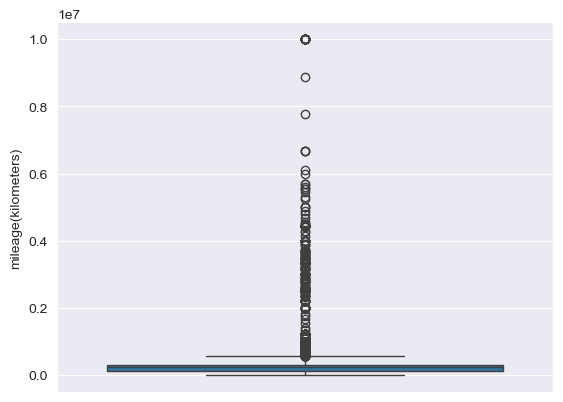

In [119]:
sns.boxplot(data=X_train['mileage(kilometers)'])

In [162]:
X_train.head(1)

,year,mileage(kilometers),fuel_type,volume(cm3),color,transmission,segment,condition_w_Mileage,drive_unit_filled,make_new,model_new
51949,1996,222000.0,petrol,1600.0,other,mechanics,D,1,front-wheel drive,opel,vectra


In [121]:
X_train.drop(X_train[X_train['mileage(kilometers)']>500000].index,inplace=True)

<Axes: xlabel='mileage(kilometers)', ylabel='Count'>

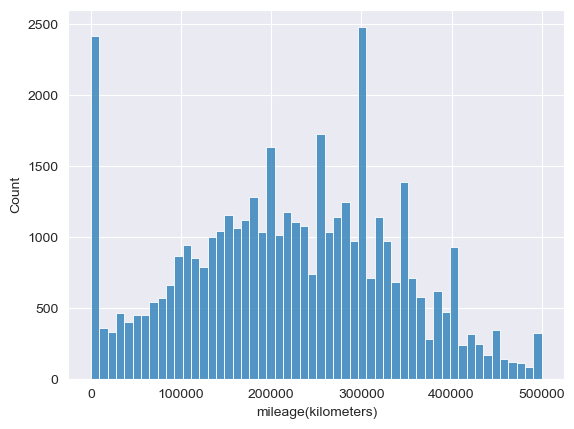

In [122]:
sns.histplot(data=X_train['mileage(kilometers)'])

<Axes: >

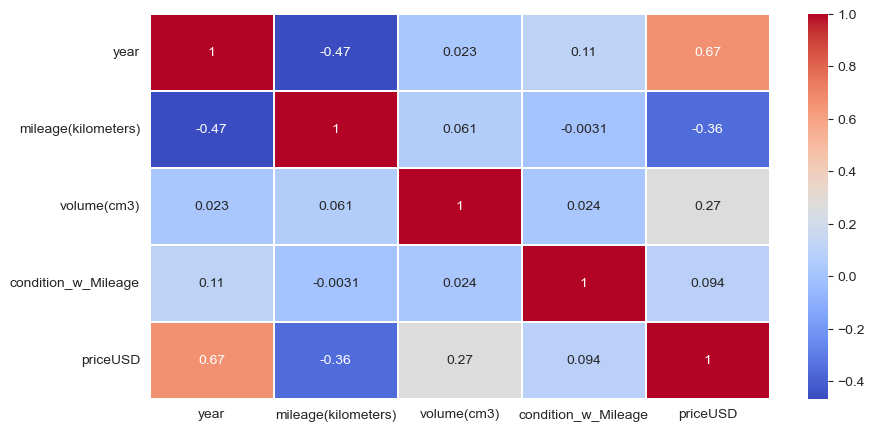

In [123]:
plt.figure(figsize=(10,5))
sns.heatmap(X_train.corr(numeric_only=True),cmap='coolwarm',annot=True,linewidths=.2)

<Axes: xlabel='condition_w_Mileage', ylabel='priceUSD'>

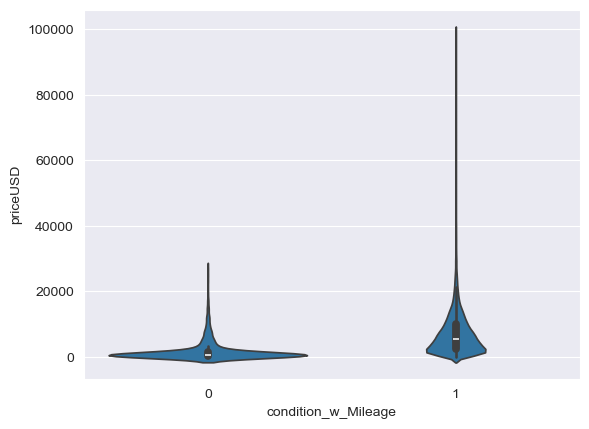

In [124]:
sns.violinplot(data=X_train,x='condition_w_Mileage',y='priceUSD')

<Axes: xlabel='volume(cm3)', ylabel='priceUSD'>

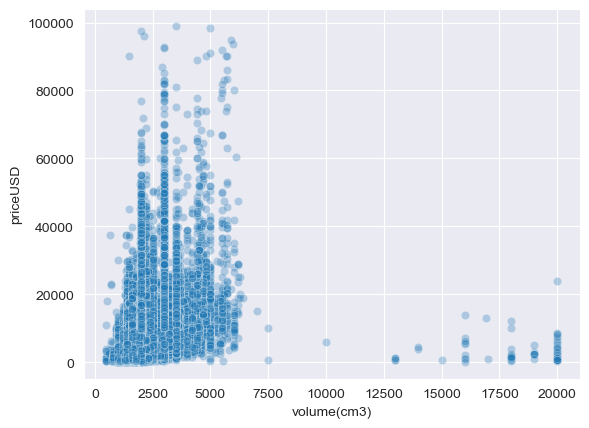

In [125]:
sns.scatterplot(data=X_train,x='volume(cm3)',y='priceUSD',alpha=.3)

In [126]:
# Most of the data are centred aroud 0 to 7000 we will remove any value beyound it 
X_train.drop(X_train[X_train['volume(cm3)']>7000].index,inplace=True)

In [127]:
X_train.drop(X_train[(X_train['mileage(kilometers)']>110000) & (X_train['priceUSD']>60000)].index,inplace=True)

In [128]:
X_train.drop(X_train[(X_train['volume(cm3)']<2500) & (X_train['priceUSD']>80000)].index,inplace=True)

<Axes: xlabel='year', ylabel='priceUSD'>

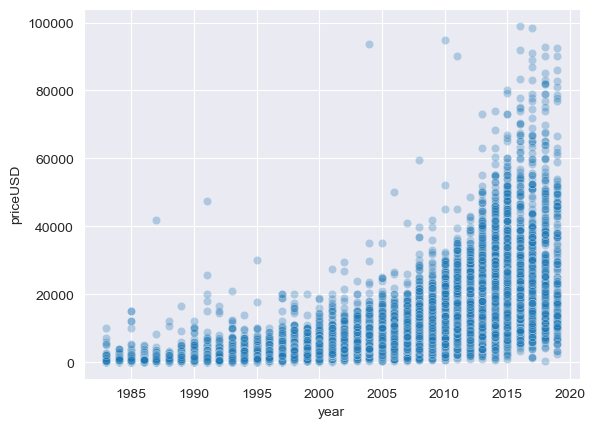

In [129]:
sns.scatterplot(data=X_train,x='year',y='priceUSD',alpha=.3)

In [130]:
X_train.drop(X_train.query('year < 2000 and priceUSD > 19000').index,inplace=True)
X_train.drop(X_train.query('year < 2015 and priceUSD > 80000').index,inplace=True)

<Axes: ylabel='Frequency'>

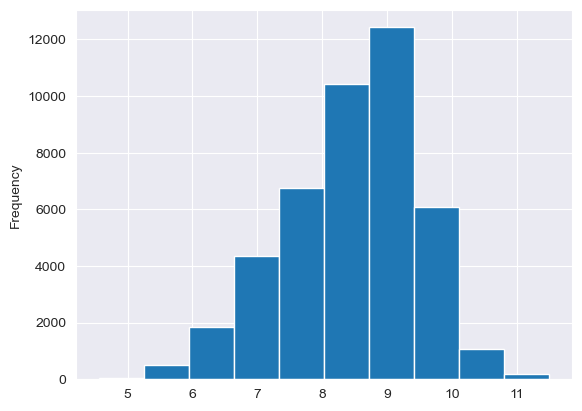

In [131]:
np.log(X_train.priceUSD).plot.hist()

In [132]:
y_train = X_train.priceUSD
X_train.drop('priceUSD',axis=1,inplace=True)

<Axes: ylabel='Frequency'>

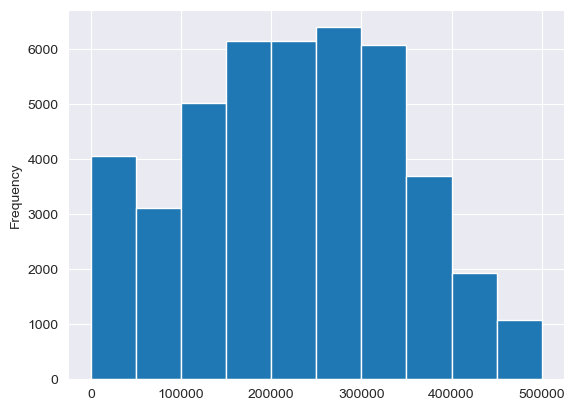

In [133]:
X_train['mileage(kilometers)'].plot(kind='hist')

In [134]:
cols_log.append('volume(cm3)')

# Modeling

In [135]:
def preproccess(df):
    
    # Change the less freq manuf to others 
    df['make_new'] = df['make'].apply(lambda x : x if x in most_repeated_make else 'others')
           
    # Change the less freq model to others 
    df['model_new'] = df['model'].apply(lambda x : x if x in most_freq_models else 'others')
    
    # Drop old columns
    df.drop(columns=['make','model'],inplace=True)
    
    df.segment.fillna('unknown',inplace=True)
    
    return df

In [136]:
X_test = preproccess(X_test)

C:\Users\VICTUS\AppData\Local\Temp\ipykernel_15132\4174263811.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.segment.fillna('unknown',inplace=True)


In [137]:
X_train.sample(10)

,year,mileage(kilometers),fuel_type,volume(cm3),color,transmission,segment,condition_w_Mileage,drive_unit_filled,make_new,model_new
32600,2008,175000.0,petrol,1400.0,black,mechanics,C,1,front-wheel drive,others,others
15917,2007,250000.0,diesel,2000.0,white,mechanics,D,1,front-wheel drive,toyota,others
52282,2011,281000.0,diesel,2200.0,gray,auto,M,1,rear drive,mercedes-benz,others
40549,2008,152000.0,diesel,1400.0,burgundy,mechanics,B,1,front-wheel drive,volkswagen,others
51789,2007,104000.0,petrol,1800.0,gray,mechanics,D,1,front-wheel drive,opel,vectra
3617,1996,300000.0,petrol,1500.0,purple,mechanics,C,1,front-wheel drive,mazda,others
36145,1998,300.0,petrol,2000.0,white,auto,C,1,front-wheel drive,others,others
9445,2012,180000.0,diesel,3000.0,gray,auto,E,1,front-wheel drive,bmw,5-seriya
39055,1997,300000.0,petrol,1600.0,green,mechanics,D,1,front-wheel drive,volkswagen,passat
1024,2001,201000.0,diesel,2000.0,black,mechanics,A,1,front-wheel drive,others,others


In [138]:
X_test.head()

,year,mileage(kilometers),fuel_type,volume(cm3),color,transmission,segment,condition_w_Mileage,drive_unit_filled,make_new,model_new
37810,2009,120000.00,petrol,1100.0,black,mechanics,unknown,1,front-wheel drive,fiat,others
11791,2008,164000.00,petrol,1800.0,other,auto,D,1,front-wheel drive,audi,a4
6591,2002,42000.00,petrol,1500.0,silver,mechanics,B,1,front-wheel drive,lada-vaz,others
50705,2007,151277.96,petrol,2000.0,burgundy,auto,J,1,front-wheel drive,hyundai,others
28573,2007,186.00,petrol,2000.0,blue,mechanics,unknown,1,front-wheel drive,renault,others


In [139]:
# Column transformation
trf = ColumnTransformer([
    ('log_trf',FunctionTransformer(func=np.log,inverse_func=np.exp),[3]),
    ('std_trf',StandardScaler(),[1]),
    ('ohe_trf',OneHotEncoder(sparse_output=False),[2,4,5,6,8,9,10]),
    ('Kbin_trf',KBinsDiscretizer(n_bins=18,strategy='uniform'),[0])
],remainder='passthrough')

In [141]:
# hist gradient and bagging regressor performing well

In [163]:
model = TransformedTargetRegressor(regressor=RandomForestRegressor(),func=np.log,inverse_func=np.exp)
    
pipe = Pipeline([
    ('trf',trf),
    ('model_fitting',model)
])

In [164]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('trf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('log_trf',
                                                  FunctionTransformer(func=<ufunc 'log'>,
                                                                      inverse_func=<ufunc 'exp'>),
                                                  [3]),
                                                 ('std_trf', StandardScaler(),
                                                  [1]),
                                                 ('ohe_trf',
                                                  OneHotEncoder(sparse_output=False),
                                                  [2, 4, 5, 6, 8, 9, 10]),
                                                 ('Kbin_trf',
                                                  KBinsDiscretizer(n_bins=18,
                                                                   strategy='uniform'),
                                                  [0])])),
                ('model_fitting',
                 TransformedTargetRegressor(func=<ufunc 'log'>,
                                            inverse_func=<ufunc 'exp'>,
                                            regressor=RandomForestRegressor()))])

In [ ]:
y_pred = pipe.predict(X_test)

In [169]:
print('Model r2_score : ',r2_score(y_test,y_pred))

Model r2_score :  0.8836702686169149
